### Профильное задание на стажировку  

Дан датасет прослушиваний музыки, который нужно скачать по ссылке (описание данных можно найти там же).  

Задача: на основе этих данных построить рекомендательную систему релевантных треков для пользователей и оценить ее качество.  
В качестве метрики качества используйте NDCG@20.  

Что будет оцениваться:  
1. Наличие и содержательность exploratory data analysis.  
2. Пайплайн обучения модели:  

    * подготовка данных,  
	* feature engineering,   
	* выбор модели,   
	* выбор loss функции,   
	* корректная оценка метрик качества.  
        
3. Наличие и содержательность комментариев к происходящему.  
4. Финальный скор.  


В качестве решения пришлите ссылку на GitHub репозиторий в поле для ответа.  


In [20]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import re
from prettytable import PrettyTable 

In [171]:
# Функция для вывода доли пропущенных значений

def print_missing_ratio_df(df):
    print('\nДоли пропущенных значений:')
    print(df.isnull().sum() / df.shape[0] * 100)

# Загрузка данных

In [15]:
# загружаем train.csv

train_df = pd.read_csv('data/train.csv')
train_df.info()
print_missing_ratio_df(train_df)
train_df.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7377418 entries, 0 to 7377417
Data columns (total 6 columns):
 #   Column              Dtype 
---  ------              ----- 
 0   msno                object
 1   song_id             object
 2   source_system_tab   object
 3   source_screen_name  object
 4   source_type         object
 5   target              int64 
dtypes: int64(1), object(5)
memory usage: 337.7+ MB

Доли пропущенных значений:
msno                  0.000000
song_id               0.000000
source_system_tab     0.336825
source_screen_name    5.622618
source_type           0.291959
target                0.000000
dtype: float64


,msno,song_id,source_system_tab,source_screen_name,source_type,target
0,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,explore,Explore,online-playlist,1
1,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,bhp/MpSNoqoxOIB+/l8WPqu6jldth4DIpCm3ayXnJqM=,my library,Local playlist more,local-playlist,1
2,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,JNWfrrC7zNN7BdMpsISKa4Mw+xVJYNnxXh3/Epw7QgY=,my library,Local playlist more,local-playlist,1
3,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,2A87tzfnJTSWqD7gIZHisolhe4DMdzkbd6LzO1KHjNs=,my library,Local playlist more,local-playlist,1
4,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,3qm6XTZ6MOCU11x8FIVbAGH5l5uMkT3/ZalWG1oo2Gc=,explore,Explore,online-playlist,1
5,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,3Hg5kugV1S0wzEVLAEfqjIV5UHzb7bCrdBRQlGygLvU=,explore,Explore,online-playlist,1
6,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,VkILU0H1h3NMmk9MQrXouNudGk5n8Ls5cqRRuBxeTh4=,my library,Local playlist more,local-playlist,1
7,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,bPIvRTzfHxH5LgHrStll+tYwSQNVV8PySgA3M1PfTgc=,explore,Explore,online-playlist,1
8,uHqAtShXTRXju5GE8ri3ITsVFepPf8jUoCF7ffNOuqE=,/bU6IRSK+YNlNbaTkxo7bhsb2EDLPrnksdX3ggcZNhI=,my library,Local playlist more,local-library,1
9,uHqAtShXTRXju5GE8ri3ITsVFepPf8jUoCF7ffNOuqE=,EbI7xoNxI+3QSsiHxL13zBdgHIJOwa3srHd7cDcnJ0g=,my library,Local playlist more,local-library,1


In [16]:
# загружаем test.csv

test_df = pd.read_csv('data/test.csv')
test_df.info()
print_missing_ratio_df(test_df)
test_df.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2556790 entries, 0 to 2556789
Data columns (total 6 columns):
 #   Column              Dtype 
---  ------              ----- 
 0   id                  int64 
 1   msno                object
 2   song_id             object
 3   source_system_tab   object
 4   source_screen_name  object
 5   source_type         object
dtypes: int64(1), object(5)
memory usage: 117.0+ MB

Доли пропущенных значений:
id                    0.000000
msno                  0.000000
song_id               0.000000
source_system_tab     0.330180
source_screen_name    6.370605
source_type           0.285397
dtype: float64


,id,msno,song_id,source_system_tab,source_screen_name,source_type
0,0,V8ruy7SGk7tDm3zA51DPpn6qutt+vmKMBKa21dp54uM=,WmHKgKMlp1lQMecNdNvDMkvIycZYHnFwDT72I5sIssc=,my library,Local playlist more,local-library
1,1,V8ruy7SGk7tDm3zA51DPpn6qutt+vmKMBKa21dp54uM=,y/rsZ9DC7FwK5F2PK2D5mj+aOBUJAjuu3dZ14NgE0vM=,my library,Local playlist more,local-library
2,2,/uQAlrAkaczV+nWCd2sPF2ekvXPRipV7q0l+gbLuxjw=,8eZLFOdGVdXBSqoAv5nsLigeH2BvKXzTQYtUM53I0k4=,discover,NaN,song-based-playlist
3,3,1a6oo/iXKatxQx4eS9zTVD+KlSVaAFbTIqVvwLC1Y0k=,ztCf8thYsS4YN3GcIL/bvoxLm/T5mYBVKOO4C9NiVfQ=,radio,Radio,radio
4,4,1a6oo/iXKatxQx4eS9zTVD+KlSVaAFbTIqVvwLC1Y0k=,MKVMpslKcQhMaFEgcEQhEfi5+RZhMYlU3eRDpySrH8Y=,radio,Radio,radio
5,5,1a6oo/iXKatxQx4eS9zTVD+KlSVaAFbTIqVvwLC1Y0k=,NV3nhEcMqsawwvSNTUAt9IVAexHLOm0lDfrHyEfN5B0=,radio,Radio,radio
6,6,1a6oo/iXKatxQx4eS9zTVD+KlSVaAFbTIqVvwLC1Y0k=,DPM6G9RB5QO2dvAVPyc70gxHdvu872IjTUvV6LJT8ho=,radio,Radio,radio
7,7,1a6oo/iXKatxQx4eS9zTVD+KlSVaAFbTIqVvwLC1Y0k=,JGXB3PHc0CX0JskwwjmYP8i318BLo7DhChgEj6Yqjt8=,my library,Local playlist more,local-playlist
8,8,1a6oo/iXKatxQx4eS9zTVD+KlSVaAFbTIqVvwLC1Y0k=,507plIkmke1jh3wMrHqKore82pPFozADwydR8P0Gx2Q=,radio,Radio,radio
9,9,3ZQ6oGfcSiUoCrtBPKGa8hHCiFh5jqtDqPVDUl/zrjU=,HsgJXv1C7iVZiP7CWwWTfsmMhia6Huc0MUccfj+D02o=,my library,Local playlist more,local-library


In [17]:
# загружаем songs.csv

songs_df = pd.read_csv('data/songs.csv')
songs_df.info()
print_missing_ratio_df(songs_df)
songs_df.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2296320 entries, 0 to 2296319
Data columns (total 7 columns):
 #   Column       Dtype  
---  ------       -----  
 0   song_id      object 
 1   song_length  int64  
 2   genre_ids    object 
 3   artist_name  object 
 4   composer     object 
 5   lyricist     object 
 6   language     float64
dtypes: float64(1), int64(1), object(5)
memory usage: 122.6+ MB

Доли пропущенных значений:
song_id         0.000000
song_length     0.000000
genre_ids       4.098558
artist_name     0.000000
composer       46.655431
lyricist       84.714064
language        0.000044
dtype: float64


,song_id,song_length,genre_ids,artist_name,composer,lyricist,language
0,CXoTN1eb7AI+DntdU1vbcwGRV4SCIDxZu+YD8JP8r4E=,247640,465,張信哲 (Jeff Chang),董貞,何啟弘,3.0
1,o0kFgae9QtnYgRkVPqLJwa05zIhRlUjfF7O1tDw0ZDU=,197328,444,BLACKPINK,TEDDY| FUTURE BOUNCE| Bekuh BOOM,TEDDY,31.0
2,DwVvVurfpuz+XPuFvucclVQEyPqcpUkHR0ne1RQzPs0=,231781,465,SUPER JUNIOR,NaN,NaN,31.0
3,dKMBWoZyScdxSkihKG+Vf47nc18N9q4m58+b4e7dSSE=,273554,465,S.H.E,湯小康,徐世珍,3.0
4,W3bqWd3T+VeHFzHAUfARgW9AvVRaF4N5Yzm4Mr6Eo/o=,140329,726,貴族精選,Traditional,Traditional,52.0
5,kKJ2JNU5h8rphyW21ovC+RZU+yEHPM+3w85J37p7vEQ=,235520,864|857|850|843,貴族精選,Joe Hisaishi,Hayao Miyazaki,17.0
6,N9vbanw7BSMoUgdfJlgX1aZPE1XZg8OS1wf88AQEcMc=,226220,458,伍佰 & China Blue,Jonathan Lee,NaN,3.0
7,GsCpr618xfveHYJdo+E5SybrpR906tsjLMeKyrCNw8s=,276793,465,光良 (Michael Wong),光良,彭資閔,3.0
8,oTi7oINPX+rxoGp+3O6llSltQTl80jDqHoULfRoLcG4=,228623,465,林俊傑 (JJ Lin),JJ Lin,Wu Qing Feng,3.0
9,btcG03OHY3GNKWccPP0auvtSbhxog/kllIIOx5grE/k=,232629,352|1995,Kodaline,Stephen Garrigan| Mark Prendergast| Vincent Ma...,Stephen Garrigan| Mark Prendergast| Vincent Ma...,52.0


In [18]:
# загружаем song_extra_info.csv

song_extra_info_df = pd.read_csv('data/song_extra_info.csv')
song_extra_info_df.info()
print_missing_ratio_df(song_extra_info_df)
song_extra_info_df.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2295971 entries, 0 to 2295970
Data columns (total 3 columns):
 #   Column   Dtype 
---  ------   ----- 
 0   song_id  object
 1   name     object
 2   isrc     object
dtypes: object(3)
memory usage: 52.6+ MB

Доли пропущенных значений:
song_id    0.000000
name       0.000131
isrc       5.947288
dtype: float64


,song_id,name,isrc
0,LP7pLJoJFBvyuUwvu+oLzjT+bI+UeBPURCecJsX1jjs=,我們,TWUM71200043
1,ClazTFnk6r0Bnuie44bocdNMM3rdlrq0bCGAsGUWcHE=,Let Me Love You,QMZSY1600015
2,u2ja/bZE3zhCGxvbbOB3zOoUjx27u40cf5g09UXMoKQ=,原諒我,TWA530887303
3,92Fqsy0+p6+RHe2EoLKjHahORHR1Kq1TBJoClW9v+Ts=,Classic,USSM11301446
4,0QFmz/+rJy1Q56C1DuYqT9hKKqi5TUqx0sN0IwvoHrw=,愛投羅網,TWA471306001
5,QU8f6JR0/cwLGSqJX2XDVzFK0DxMaIUY15ALJXK7ziw=,Our Time,GBAYE1400079
6,O1Oj4CmnZhbHl7oyBaHSpGeu5gvcSmUydY3Awmv3uxk=,癢,HKUM70704066
7,Tr5R61AuEkN8UelOCzu09ZwQi7/HmP9sQmxf9rFngIg=,Aloha| E Komo Mai (Theme Song from Lilo & Stit...,USWD10423930
8,ie9l12ZYXEaP4evrBBUvnNnZGdupHSX5NU+tEqB1SDg=,每天愛你多一些,HKA610200010
9,6mICNlckUVGuoK/XGC7bnxXf5s2ZnkpFHShaGL/zM2Y=,你是你的,TWI431000103


In [19]:
# загружаем members.csv

members_df = pd.read_csv('data/members.csv')
members_df.info()
print_missing_ratio_df(members_df)
members_df.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34403 entries, 0 to 34402
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   msno                    34403 non-null  object
 1   city                    34403 non-null  int64 
 2   bd                      34403 non-null  int64 
 3   gender                  14501 non-null  object
 4   registered_via          34403 non-null  int64 
 5   registration_init_time  34403 non-null  int64 
 6   expiration_date         34403 non-null  int64 
dtypes: int64(5), object(2)
memory usage: 1.8+ MB

Доли пропущенных значений:
msno                       0.000000
city                       0.000000
bd                         0.000000
gender                    57.849606
registered_via             0.000000
registration_init_time     0.000000
expiration_date            0.000000
dtype: float64


,msno,city,bd,gender,registered_via,registration_init_time,expiration_date
0,XQxgAYj3klVKjR3oxPPXYYFp4soD4TuBghkhMTD4oTw=,1,0,NaN,7,20110820,20170920
1,UizsfmJb9mV54qE9hCYyU07Va97c0lCRLEQX3ae+ztM=,1,0,NaN,7,20150628,20170622
2,D8nEhsIOBSoE6VthTaqDX8U6lqjJ7dLdr72mOyLya2A=,1,0,NaN,4,20160411,20170712
3,mCuD+tZ1hERA/o5GPqk38e041J8ZsBaLcu7nGoIIvhI=,1,0,NaN,9,20150906,20150907
4,q4HRBfVSssAFS9iRfxWrohxuk9kCYMKjHOEagUMV6rQ=,1,0,NaN,4,20170126,20170613
5,zgPOEyUn5a/Fvuzb3m69ajzxjkbblVtObglW89FzLdo=,13,43,female,9,20120703,20171006
6,Sw9AT8QoR4wWiNUqHZUH6g5ahzGUx4lo1g+Y3xE2f2M=,1,0,NaN,4,20160326,20160329
7,pg6bT2XZkSP1TDBy4qn3HBPY/HffKQ/bg8WIISQYBSY=,1,0,NaN,7,20160130,20170930
8,kfk1AdTNH2dNqF5LzIs4e0vwGPejw2jrnFjJlcYnEgk=,1,0,NaN,7,20110111,20170930
9,tscijwx4dbEp0NXGl+iFtHJ8zrj+TkcMrduOQk9t+gE=,1,0,NaN,7,20160217,20170613


Для удобства проведения разведочного анализа объединим данные

In [21]:
# Объединяем songs и song_extra_info 
songs_df = songs_df.merge(song_extra_info_df, on='song_id', how='left')

# Объединяем train и songs 
train_df = train_df.merge(songs_df, on='song_id', how='left')

# Объединяем test и songs
test_df = test_df.merge(songs_df, on='song_id', how='left')

# Объединяем train и members 
train_df = train_df.merge(members_df, on='msno', how='left')

# Объединяем test и members
test_df = test_df.merge(members_df, on='msno', how='left')

# Объединяем train и testers
concat_df = pd.concat([train_df, test_df])

In [51]:
print(
    "Кол-во строк в train: ", train_df.shape[0],
    "\nКол-во строк в test: ", test_df.shape[0], 
    "\nВсего строк: ",train_df.shape[0] + test_df.shape[0]
)
print(
    "Доля train: ", round(train_df.shape[0] / (train_df.shape[0] + test_df.shape[0]),1),
    "\nДоля test: ", round(test_df.shape[0] / (train_df.shape[0] + test_df.shape[0]),1),
)

Кол-во строк в train:  7377418 
Кол-во строк в test:  2556790 
Всего строк:  9934208
Доля train:  0.7 
Доля test:  0.3


In [87]:
train_unique_msno = train_df['msno'].drop_duplicates()
test_unique_msno = test_df['msno'].drop_duplicates()
concat_df_unique_msno = concat_df['msno'].drop_duplicates()

In [106]:
print('Доля уникальных пользователей в наборе train: ', round((len(train_unique_msno) / train_df.shape[0] * 100),2))
print('Доля уникальных пользователей в наборе test: ', round((len(test_unique_msno) / test_df.shape[0] * 100),2))
      
print('Доля уникальных пользователей в объединенном наборе (train + test): ', 
      round((len(concat_df_unique_msno) / concat_df.shape[0] * 100),2))

Доля уникальных пользователей в наборе train:  0.42
Доля уникальных пользователей в наборе test:  0.98
Доля уникальных пользователей в объединенном наборе (train + test):  0.35


In [57]:
train_df.shape[0]//train_unique_msno.shape[0], test_df.shape[0]//test_unique_msno.shape[0]

(239, 101)

* В наборе train всего 7377418 строк и только 30755 уникальных пользователя. На каждого пользователя в среднем приходится 239 строк.
* В наборе test всего 2556790 строк и только 25131 уникальных пользователя. На каждого пользователя в среднем приходится 101 строк.
* В объединенном наборе (train + test) всего 9934208 строк и только 34403 уникальных пользователя.  

* 9272 полностью уникальных пользователя для train и test в наборе test. 
* 3648 полностью уникальных пользователя для train и test в наборе train.  

**3648 / 25131 = 14.5% уникальных пользователей в тестовом наборе, которые не представлены в тренировочном.**

In [120]:
train_minus_test_by_msno_df = train_df[~train_df['msno'].isin(test_unique_msno)]
test_minus_train_by_msno_df = test_df[~test_df['msno'].isin(train_unique_msno)]

print('Уникальных строк msno содержит набор train, которых нет в наборе test', len(train_minus_test_by_msno_df))
print('Уникальных строк msno содержит набор test, которых нет в наборе train: ', len(test_minus_train_by_msno_df))

Уникальных строк msno содержит набор train, которых нет в наборе test 431857
Уникальных строк msno содержит набор test, которых нет в наборе train:  184018


431857 уникальных строк **msno** содержит набор train, которых нет в наборе test.
184018 уникальных строк **msno** содержит набор, которых нет в наборе train.  

**184018 / 2556790 = 7.2% строк msno имеются в тестовом наборе, которые не представлены в наборе train**

In [123]:
train_unique_song = train_df['song_id'].drop_duplicates()
test_unique_song = test_df['song_id'].drop_duplicates()
concat_df_unique_song = concat_df['song_id'].drop_duplicates()

In [129]:
print('Уникальных songs содержится в наборе train: ', (len(train_unique_song) / train_df.shape[0] * 100),"%")
print('Уникальных songs содержится в наборе test: ' , (len(test_unique_song) / test_df.shape[0] * 100),"%")
print('Уникальных songs содержится в объединенном наборе (train + test): ' , (len(concat_df_unique_song) / concat_df.shape[0] * 100),"%")

Уникальных songs содержится в наборе train:  4.879295168038465 %
Уникальных songs содержится в наборе test:  8.79043644569949 %
Уникальных songs содержится в объединенном наборе (train + test):  4.226194982025744 %


Набор train содержит 7377418 строк и только 359966 из них содержат уникальные песни. В среднем каждая песня встречается 20 раз.
Набор test содержит 2556790 строк и только 224753 из них содержат уникальные песни. В среднем каждая песня встречается 11 раз.  
Объединенный набор (train + test) содержит 9934208 строк и только 419839 из них содержат уникальные песни.
195086 полностью уникальных песен для train и test в наборе test.
59873 полностью уникальных песен для train и test в наборе train.  

**59873 / 224753 = 26.6% уникальных песен в тестовом наборе, которые не представлены в тренировочном.**

In [131]:
train_minus_test_by_song_df = train_df[~train_df['song_id'].isin(test_unique_song)]
test_minus_train_by_song_df = test_df[~test_df['song_id'].isin(train_unique_song)]

print('Строк содержится в тренировочном наборе, которых нет в тестовом наборе: ', len(train_minus_test_by_song_df))
print('Строк содержится в тестовом наборе, которых нет в тренировочном наборе: ', len(test_minus_train_by_song_df))

Строк содержится в тренировочном наборе, которых нет в тестовом наборе:  342793
Строк содержится в тестовом наборе, которых нет в тренировочном наборе:  320125


342793 Строк с **песнями** содержится в тренировочном наборе, которых нет в тестовом наборе.  
320125 Строк с **песнями** содержится в тестовом наборе, которых нет в тренировочном наборе.  
**320125 / 2556790 = 12.5% песен имеются в тестовом наборе, которые не представлены в наборе train.**

In [136]:
concat_df.shape

(9934208, 21)

In [132]:
concat_df.describe()

,target,song_length,language,city,bd,registered_via,registration_init_time,expiration_date,id
count,7.377418e+06,9.934069e+06,9.934016e+06,9.934208e+06,9.934208e+06,9.934208e+06,9.934208e+06,9.934208e+06,2.556790e+06
mean,5.035171e-01,2.447922e+05,1.895928e+01,7.488166e+00,1.750373e+01,6.792155e+00,2.012841e+07,2.017162e+07,1.278394e+06
std,4.999877e-01,6.894272e+04,2.129986e+01,6.648934e+00,2.172704e+01,2.273409e+00,3.039067e+04,3.794595e+03,7.380818e+05
min,0.000000e+00,1.393000e+03,-1.000000e+00,1.000000e+00,-4.300000e+01,3.000000e+00,2.004033e+07,1.970010e+07,0.000000e+00
25%,0.000000e+00,2.144130e+05,3.000000e+00,1.000000e+00,0.000000e+00,4.000000e+00,2.011071e+07,2.017091e+07,6.391972e+05
50%,1.000000e+00,2.409600e+05,3.000000e+00,5.000000e+00,2.100000e+01,7.000000e+00,2.013103e+07,2.017093e+07,1.278394e+06
75%,1.000000e+00,2.715680e+05,5.200000e+01,1.300000e+01,2.900000e+01,9.000000e+00,2.015103e+07,2.017101e+07,1.917592e+06
max,1.000000e+00,1.085171e+07,5.900000e+01,2.200000e+01,1.051000e+03,1.600000e+01,2.017023e+07,2.020102e+07,2.556789e+06


In [151]:
# Тепловая карта пропущенных значений в наборе

# plt.figure(figsize = (10, 10))
# sns.heatmap(concat_df.isnull(), cbar = False, cmap = 'viridis', yticklabels = False)
# plt.title('Тепловая карта пропущенных значений в наборе test')
# plt.show()

In [150]:
dtypes = pd.DataFrame(concat_df.dtypes,columns=["Data Type"])
dtypes['Unique Values']=concat_df.nunique().sort_values(ascending=True)
dtypes['Null Values']=concat_df.isnull().sum()
dtypes['% null Values']=concat_df.isnull().sum() / len(concat_df)
dtypes.sort_values(by='Null Values' , ascending=False).style.background_gradient(cmap='YlOrRd',axis=0)

,Data Type,Unique Values,Null Values,% null Values
id,float64,2556790,7377418,0.742628
lyricist,object,37874,4403559,0.443272
gender,object,2,4013703,0.404028
target,float64,2,2556790,0.257372
composer,object,86438,2295010,0.231021
isrc,object,315922,774628,0.077976
source_screen_name,object,22,577687,0.058151
genre_ids,object,608,160565,0.016163
source_system_tab,object,8,33291,0.003351
source_type,object,12,28836,0.002903


Гендер, композитор и автор текстов сильно разрежены, т.е. у них высокий процент пропущенных слов.  
Поэтому нам нужно обращаться с ними осторожно.

### Проанализируем категориальные признаки

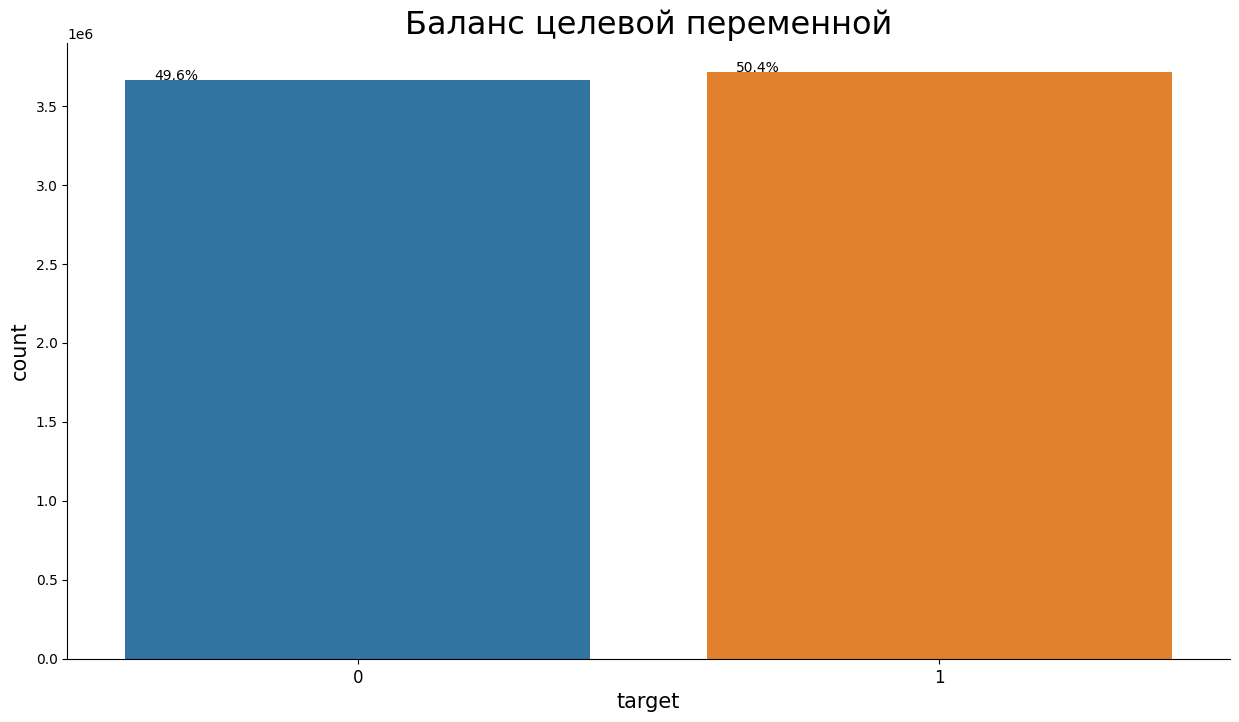

In [154]:
a = pd.DataFrame(train_df.groupby('target').size().reset_index())
a = a.sort_values(by = 0, ascending = False)

plt.figure(figsize = (15,8))
ax = sns.barplot(x= 'target',y = 0, data = a)
plt.xticks(fontsize = 12)
plt.xlabel('target', fontdict = {'fontsize':15})
plt.ylabel('count', fontdict = {'fontsize':15})
plt.title('Баланс целевой переменной', fontdict = {'fontsize': 23})

for p in ax.patches:
        ax.annotate('{:.1f}%'.format( 100*p.get_height()/train_df.shape[0]), (p.get_x()+0.05, p.get_height()+0.5), fontsize = 10)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.show()

Наш набор данных сбалансирован по переменной taget.

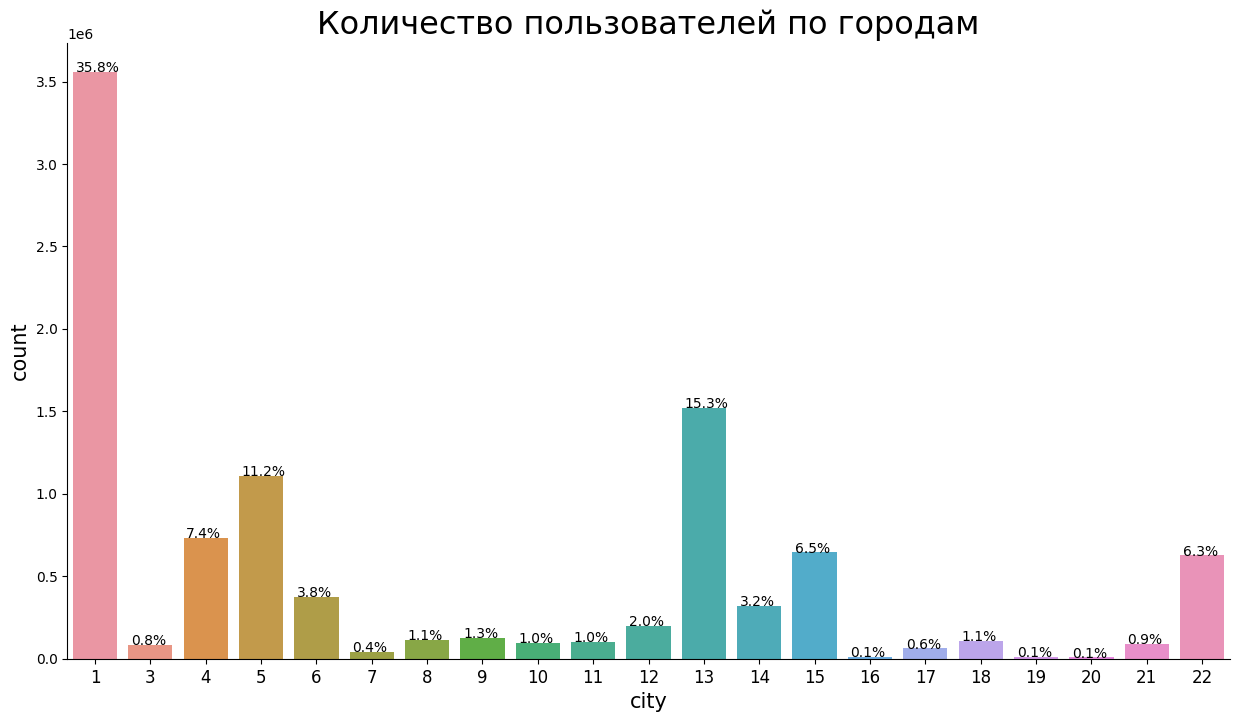

In [157]:
a = pd.DataFrame(concat_df.groupby('city').size().reset_index())
a = a.sort_values(by = 0, ascending = False)

plt.figure(figsize = (15,8))
ax = sns.barplot(x= 'city',y = 0, data = a)
plt.xticks(fontsize = 12)
plt.xlabel('city', fontdict = {'fontsize':15})
plt.ylabel('count', fontdict = {'fontsize':15})
plt.title('Количество пользователей по городам', fontdict = {'fontsize': 23})

for p in ax.patches:
        ax.annotate('{:.1f}%'.format( 100*p.get_height()/concat_df.shape[0]), (p.get_x()+0.05, p.get_height()+0.5), fontsize = 10)
        
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.show()

1. Большинство пользователей, из городов 1 и 13.
2. Города 1 и 13 должны быть городами с высокой численностью населения, поскольку в городе больше пользователей.

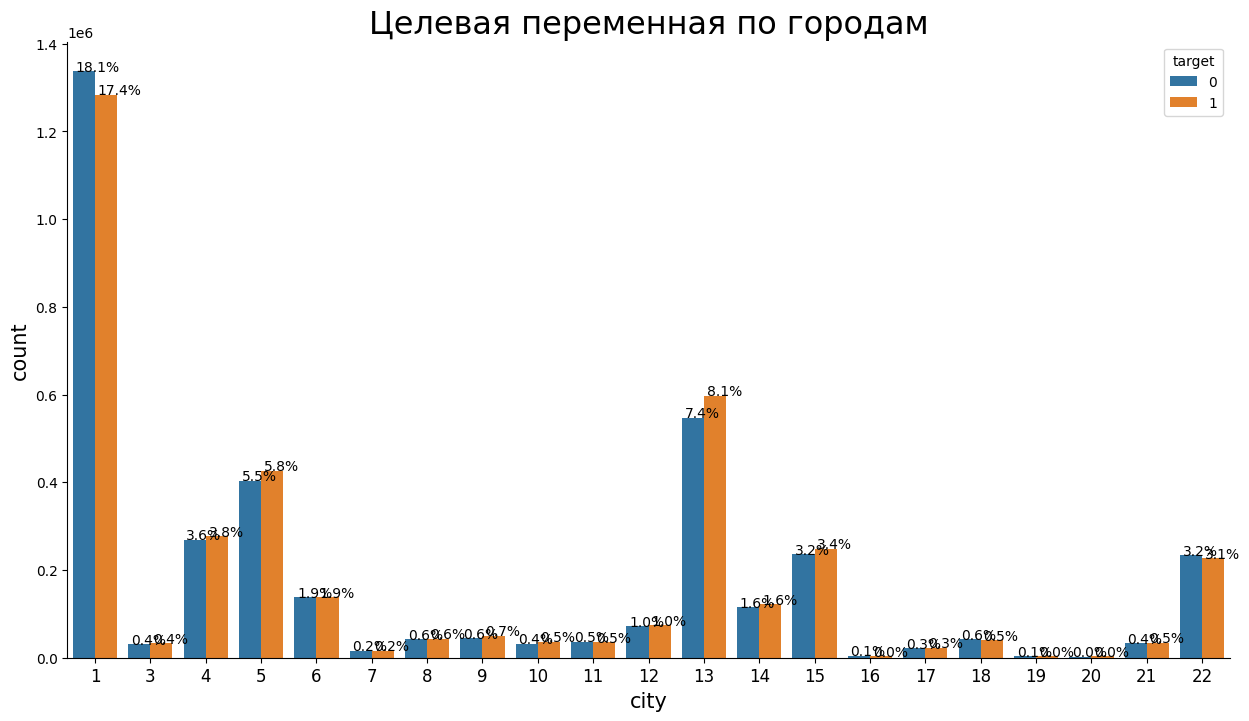

In [160]:
a = pd.DataFrame(train_df.groupby(['city', 'target']).size().reset_index())
a = a.sort_values(by = 0, ascending = False)

plt.figure(figsize = (15,8))
ax = sns.barplot(x= 'city',y = 0, data = a, hue = 'target')
plt.xticks(fontsize = 12)
plt.xlabel('city', fontdict = {'fontsize':15})
plt.ylabel('count', fontdict = {'fontsize':15})
plt.title('Целевая переменная по городам', fontdict = {'fontsize': 23})

for p in ax.patches:
        ax.annotate('{:.1f}%'.format( 100*p.get_height()/train_df.shape[0]), (p.get_x()+0.05, p.get_height()+0.5), fontsize = 10)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.show()

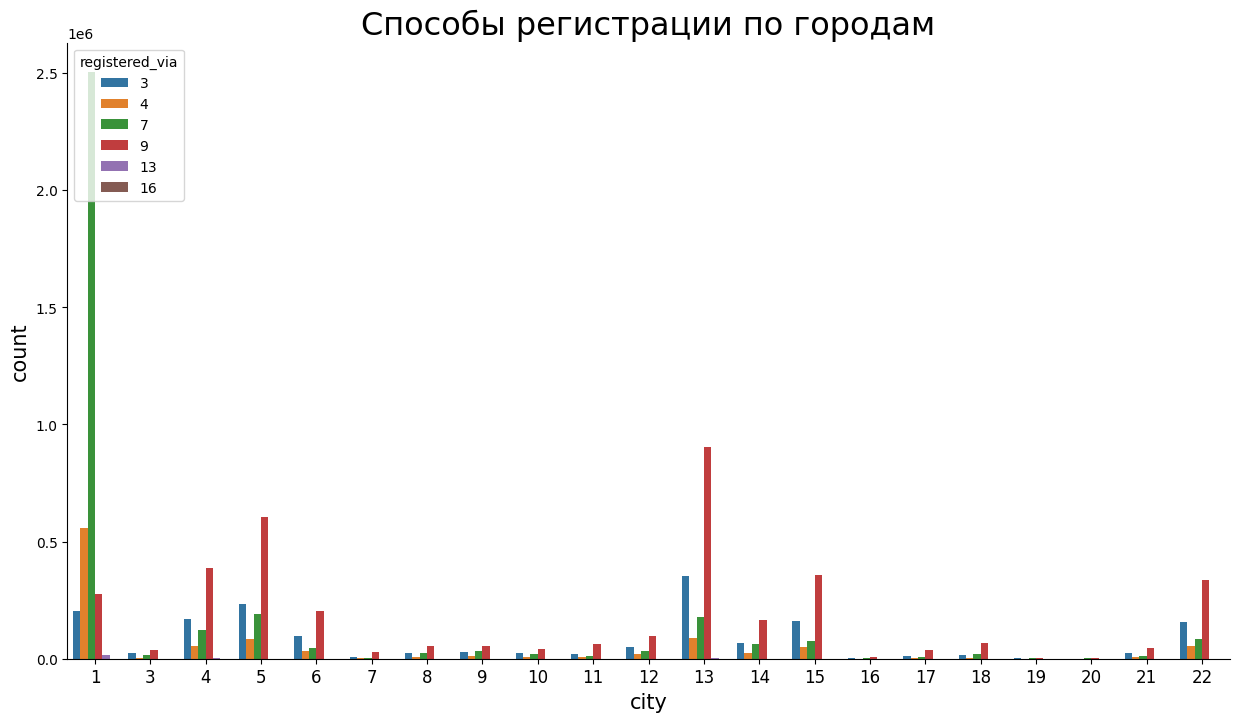

In [161]:
a = pd.DataFrame(concat_df.groupby(['city', 'registered_via']).size().reset_index())
a = a.sort_values(by = 0, ascending = False)

plt.figure(figsize = (15,8))
ax = sns.barplot(x= 'city',y = 0, data = a, hue = 'registered_via')
plt.xticks(fontsize = 12)
plt.xlabel('city', fontdict = {'fontsize':15})
plt.ylabel('count', fontdict = {'fontsize':15})
plt.title('Способы регистрации по городам', fontdict = {'fontsize': 23})

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.show()

За исключением города 1, все города в основном предпочитают способ регистрации (9), только город 1 предпочитает способ регистрации (7).

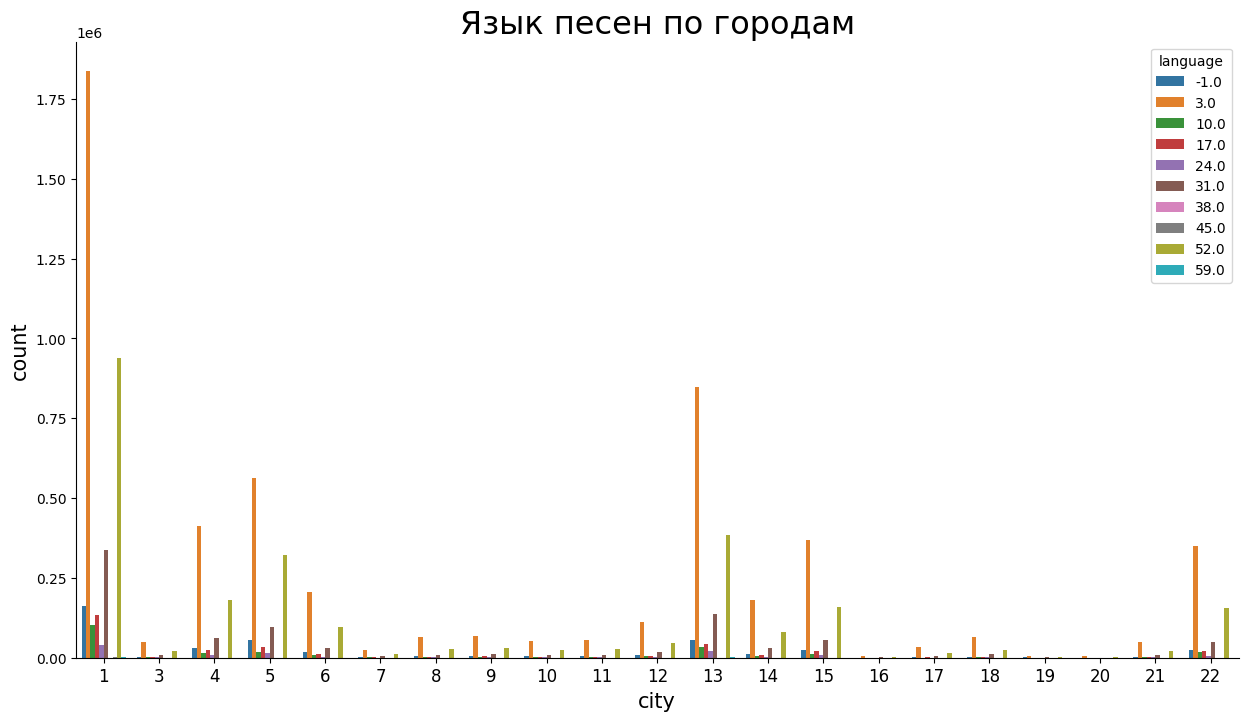

In [165]:
a = pd.DataFrame(concat_df.groupby(['city', 'language']).size().reset_index())
a = a.sort_values(by = 0, ascending = False)

plt.figure(figsize = (15,8))
ax = sns.barplot(x= 'city',y = 0, data = a, hue = 'language')
plt.xticks(fontsize = 12)
plt.xlabel('city', fontdict = {'fontsize':15})
plt.ylabel('count', fontdict = {'fontsize':15})
plt.title('Язык песен по городам', fontdict = {'fontsize': 23})

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.show()

Наиболее популярны 2 языка: 3.0 и 52.0.

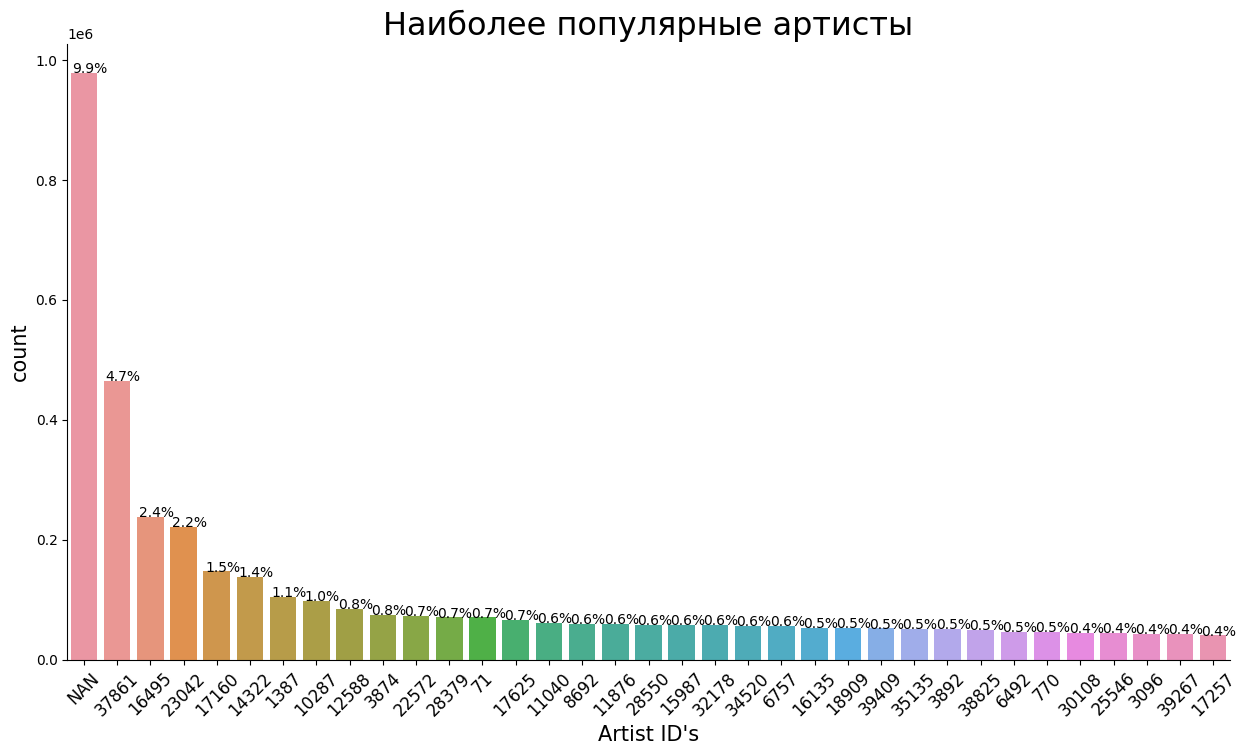

In [167]:
a = pd.DataFrame(concat_df.groupby('artist_name_processed').size().reset_index())
a = a.sort_values(by = 0, ascending = False)
a = a.iloc[:35, :]
a.replace(0, 'NAN', inplace = True)
plt.figure(figsize = (15,8))
ax = sns.barplot(x= 'artist_name_processed',y = 0, data = a)
plt.xticks(rotation= 45, fontsize = 12)
plt.xlabel('Artist ID\'s', fontdict = {'fontsize':15})
plt.ylabel('count', fontdict = {'fontsize':15})
plt.title('Наиболее популярные артисты', fontdict = {'fontsize': 23})

for p in ax.patches:
        ax.annotate('{:.1f}%'.format( 100*p.get_height()/concat_df.shape[0]), (p.get_x()+0.05, p.get_height()+0.5), fontsize = 10)
        
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.show()


In [170]:
myTable = PrettyTable(["Artist ID", "Artist Name", "Artist  ID ", "Artist  Name"]) 
a = np.array(a)
for i in range(1, a.shape[0], 2):
    myTable.add_row([a[i][0], artist_map[a[i][0]], a[i+1][0], artist_map[a[i+1][0]]]) 
print(myTable)

+-----------+-----------------+-------------+------------------+
| Artist ID |   Artist Name   | Artist  ID  |   Artist  Name   |
+-----------+-----------------+-------------+------------------+
|   37861   | various artists |    16495    |     jay chou     |
|   23042   |      mayday     |    17160    |      jj lin      |
|   14322   |       hebe      |     1387    |       amei       |
|   10287   |    eason chan   |    12588    |      g e m       |
|    3874   |     bigbang     |    22572    |      maroon      |
|   28379   |     r chord     |      71     |      a lin       |
|   17625   |    jolin tsai   |    11040    |       eric       |
|    8692   |      della      |    11876    |    fish leong    |
|   28550   |   rainie yang   |    15987    |   jacky cheung   |
|   32178   |    sodagreen    |    34520    | the chainsmokers |
|    6757   |    claire kuo   |    16135    |    jam hsiao     |
|   18909   |     kenji wu    |    39409    |     yoga lin     |
|   35135   |   the last 

* Самыми популярными исполнителями являются jay chou и mayday.
* 10% имен исполнителей отсутствуют.
* 4,1% исполнителей неизвестны, их имена указаны в разделе "различные исполнители".

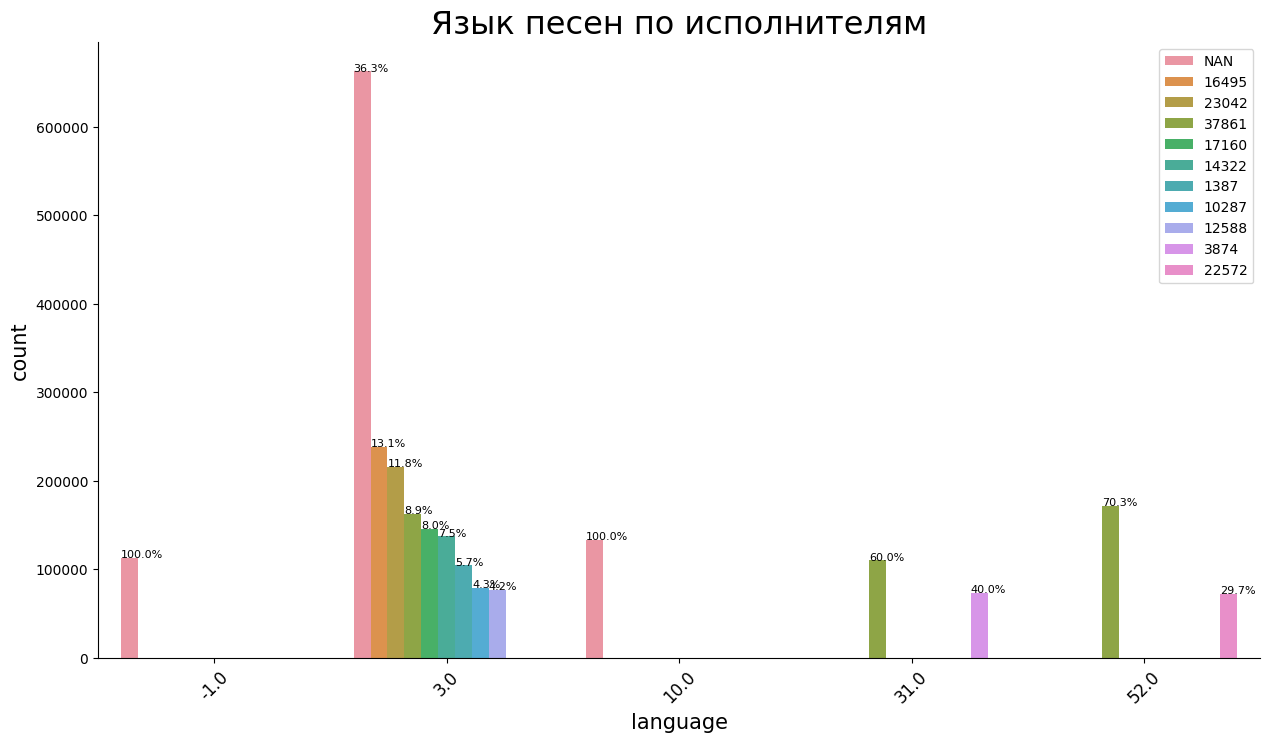

In [184]:
a = pd.DataFrame(concat_df.groupby(['language', 'artist_name_processed']).size().reset_index())
a = a.sort_values(by = 0, ascending = False)
a = a.iloc[:15, :]
a.replace(0, 'NAN', inplace = True)
b = np.array(a.groupby('language')[0].sum().reset_index())
plt.figure(figsize = (15,8))
ax = sns.barplot(hue= 'artist_name_processed',y = 0, data = a, x = 'language')
plt.xticks(rotation = 45, fontsize = 12)
plt.xlabel('language', fontdict = {'fontsize':15})
plt.ylabel('count', fontdict = {'fontsize':15})
plt.title('Язык песен по исполнителям', fontdict = {'fontsize': 23})
plt.legend(loc = 'upper right')
count = 0
for p in ax.patches:
    if count == b.shape[0]:
            count = 0
    ax.annotate('{:.1f}%'.format( 100*p.get_height()/b[count, 1]), (p.get_x(), p.get_height()+0.5), fontsize = 8)
    count+=1
        
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.show()

* jay chou и mayday - два самых популярных исполнителя на языке 3.0
* bigbang - самые популярные исполнители на языке 31.0
* Maroon - самый популярный исполнитель на языке 52.0
* Нет ни одного исполнителей на языках -1.0 и 10.0.

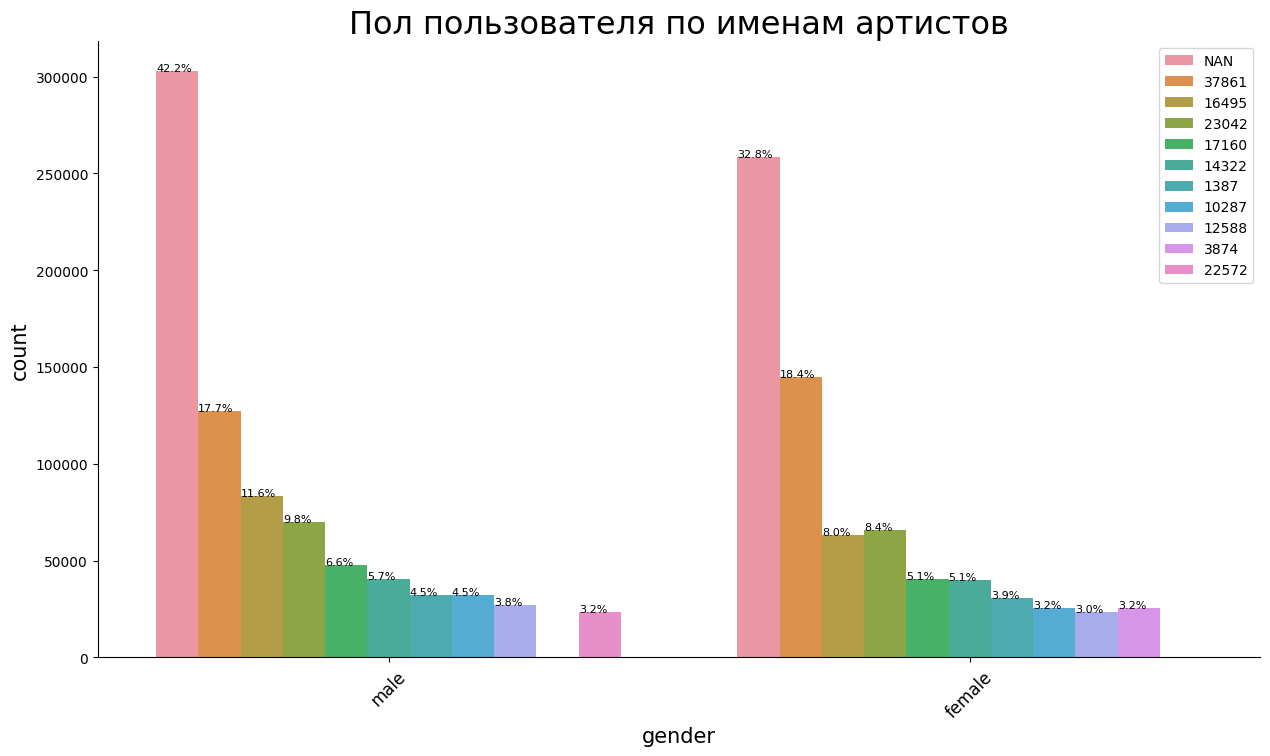

In [186]:
a = pd.DataFrame(concat_df.groupby(['gender', 'artist_name_processed']).size().reset_index())
a = a.sort_values(by = 0, ascending = False)
a = a.iloc[:20, :]
a.replace(0, 'NAN', inplace = True)
b = np.array(a.groupby('gender')[0].sum().reset_index())
plt.figure(figsize = (15,8))
ax = sns.barplot(hue= 'artist_name_processed',y = 0, data = a, x = 'gender')
plt.xticks(rotation = 45, fontsize = 12)
plt.xlabel('gender', fontdict = {'fontsize':15})
plt.ylabel('count', fontdict = {'fontsize':15})
plt.title('Пол пользователя по именам артистов', fontdict = {'fontsize': 23})
plt.legend(loc = 'upper right')
count = 0
for p in ax.patches:
    if count == b.shape[0]:
            count = 0
    ax.annotate('{:.1f}%'.format( 100*p.get_height()/b[count, 1]), (p.get_x(), p.get_height()+0.5), fontsize = 8)
    count+=1
        
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.show()

* jay chou более популярен среди мужчин, чем среди женщин.
* Bigbang популярен только у мужчин, но не у женщин.
* Sodagreen популярен только у женщин, но не у мужчин.

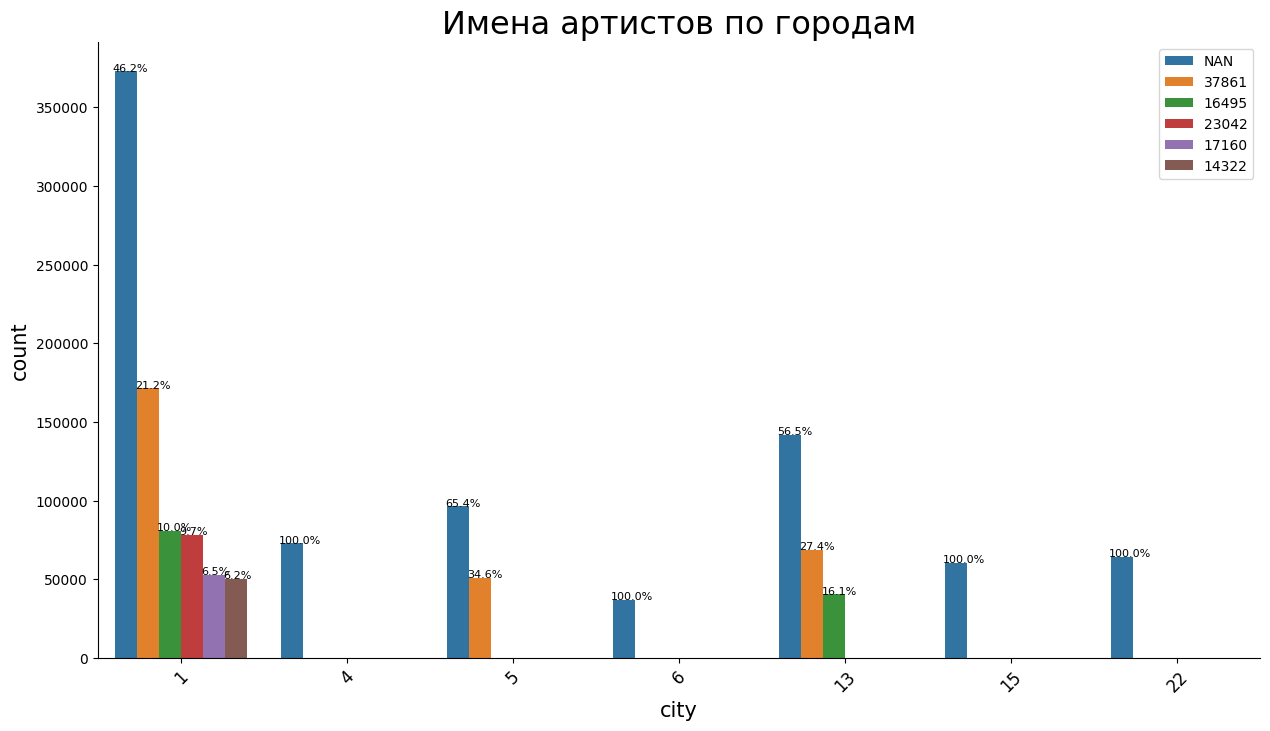

In [191]:
a = pd.DataFrame(concat_df.groupby(['city', 'artist_name_processed']).size().reset_index())
a = a.sort_values(by = 0, ascending = False)
a = a.iloc[:15, :]
a.replace(0, 'NAN', inplace = True)
b = np.array(a.groupby('city')[0].sum().reset_index())
plt.figure(figsize = (15,8))
ax = sns.barplot(hue= 'artist_name_processed',y = 0, data = a, x = 'city')
plt.xticks(rotation = 45, fontsize = 12)
plt.xlabel('city', fontdict = {'fontsize':15})
plt.ylabel('count', fontdict = {'fontsize':15})
plt.title('Имена артистов по городам', fontdict = {'fontsize': 23})
plt.legend(loc = 'upper right')
count = 0
for p in ax.patches:
    if count == b.shape[0]:
            count = 0
    ax.annotate('{:.1f}%'.format( 100*p.get_height()/b[count, 1]), (p.get_x()-0.01, p.get_height()+1), fontsize = 8)
    count+=1
        
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.show()

* jay chou and mayday наиболее популярные артисты в городах 1 и 13.  
* Для городов подномерами 4, 6, 15 и 22 все имена артистов пропущены.

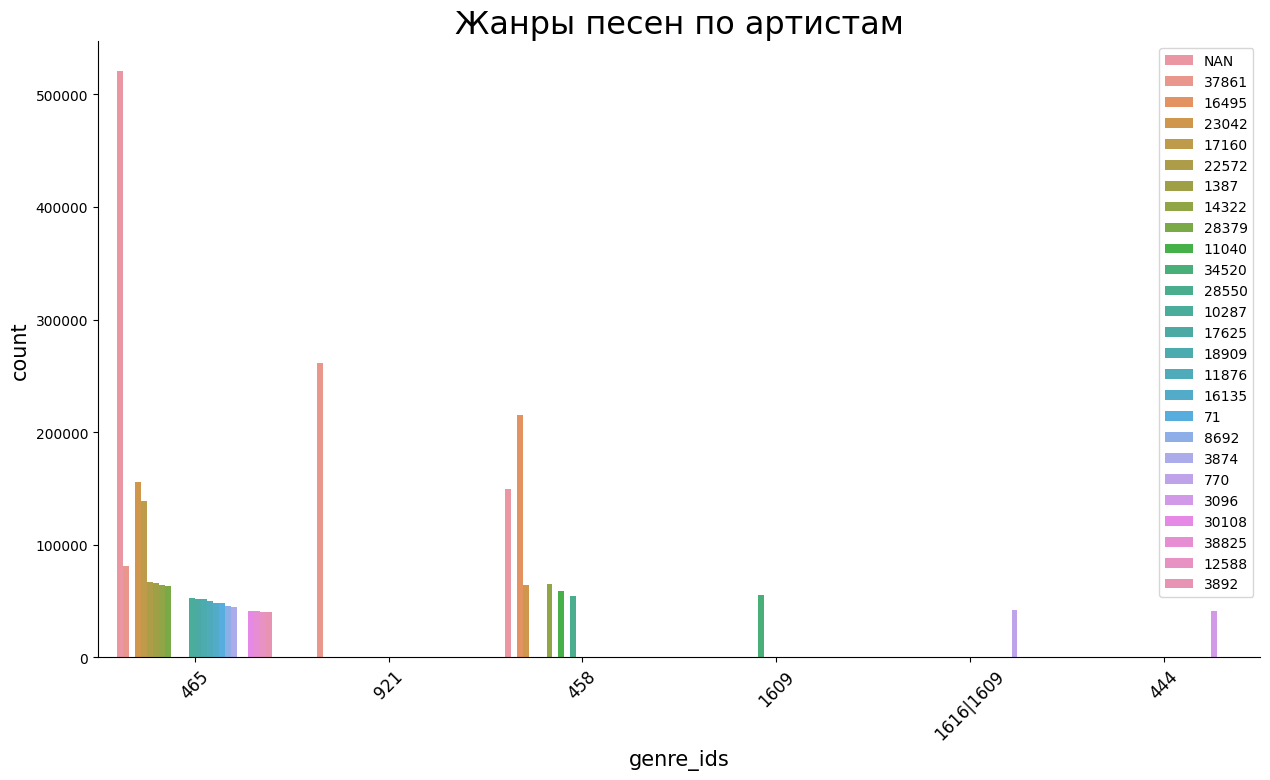

In [193]:
a = pd.DataFrame(concat_df.groupby(['genre_ids', 'artist_name_processed']).size().reset_index())
a = a.sort_values(by = 0, ascending = False)
a = a.iloc[:30, :]
a.replace(0, 'NAN', inplace = True)
b = np.array(a.groupby('genre_ids')[0].sum().reset_index().sort_values(by = 0, ascending = False))
plt.figure(figsize = (15,8))
ax = sns.barplot(hue= 'artist_name_processed',y = 0, data = a, x = 'genre_ids')
plt.xticks(rotation = 45, fontsize = 12)
plt.xlabel('genre_ids', fontdict = {'fontsize':15})
plt.ylabel('count', fontdict = {'fontsize':15})
plt.title('Жанры песен по артистам', fontdict = {'fontsize': 23})
plt.legend(loc = 'upper right')

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

In [195]:
myTable = PrettyTable(["Artist ID", "Artist Name", "Genre ID", "Count", "Artist  ID ", "Artist  Name",  "Genre  ID", "Count "]) 
a = np.array(a)
for i in range(1, a.shape[0], 2):
    try:
        myTable.add_row([a[i][1], artist_map[a[i][1]], a[i][0], a[i][2], a[i+1][1], artist_map[a[i+1][1]], a[i+1][0], a[i+1][2]])
    except:
        pass
print(myTable)

plt.show()

+-----------+-----------------+----------+--------+-------------+------------------+-----------+--------+
| Artist ID |   Artist Name   | Genre ID | Count  | Artist  ID  |   Artist  Name   | Genre  ID | Count  |
+-----------+-----------------+----------+--------+-------------+------------------+-----------+--------+
|   37861   | various artists |   921    | 261513 |    16495    |     jay chou     |    458    | 215299 |
|   17160   |      jj lin     |   465    | 138625 |    37861    | various artists  |    465    | 81116  |
|   22572   |      maroon     |   465    | 66537  |     1387    |       amei       |    465    | 66303  |
|   14322   |       hebe      |   458    | 65004  |    14322    |       hebe       |    465    | 64551  |
|   23042   |      mayday     |   458    | 64213  |    28379    |     r chord      |    465    | 63434  |
|   11040   |       eric      |   458    | 58661  |    34520    | the chainsmokers |    1609   | 55652  |
|   28550   |   rainie yang   |   458    | 541

* mayday and jj lin самые популярные артисты в жанре 465.  
* jay chou and mayday самые популярные артисты в жанре 458.  
* The Chainsmoker является единственным популярным артистом в жанре 1609.  
* Alan walker популярен в жанрах 1616 и 1609. 

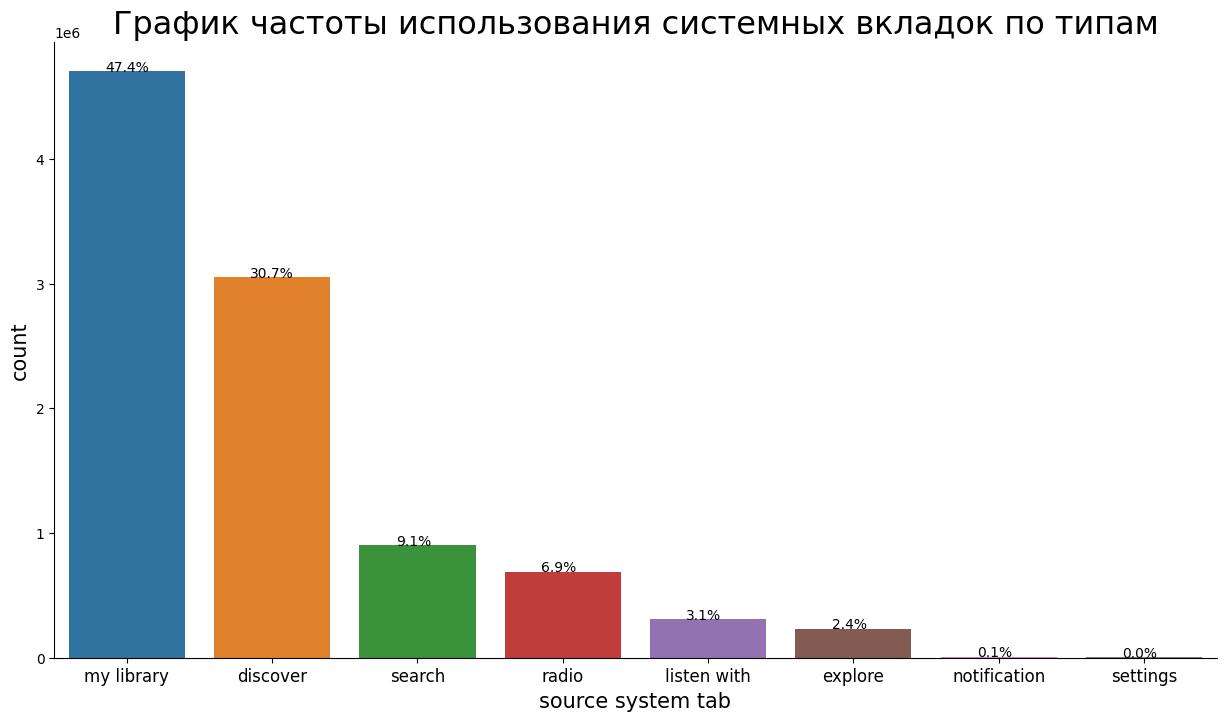

In [201]:
a = pd.DataFrame(concat_df.groupby('source_system_tab').size().reset_index())
a = a.sort_values(by = 0, ascending = False)

plt.figure(figsize = (15,8))
ax = sns.barplot(x= 'source_system_tab',y = 0, data = a)
plt.xticks(fontsize = 12)
plt.xlabel('source system tab', fontdict = {'fontsize':15})
plt.ylabel('count', fontdict = {'fontsize':15})
plt.title('График частоты использования системных вкладок по типам', fontdict = {'fontsize': 23})

for p in ax.patches:
        ax.annotate('{:.1f}%'.format( 100*p.get_height()/concat_df.shape[0]), (p.get_x()+0.25, p.get_height()+0.5), fontsize = 10)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.show()

* Большинство пользователей слушают музыку из моей библиотеки.
* Большинство людей находят песни с помощью discover, search, а затем пытаются использовать мою библиотеку для воспроизведения песен.

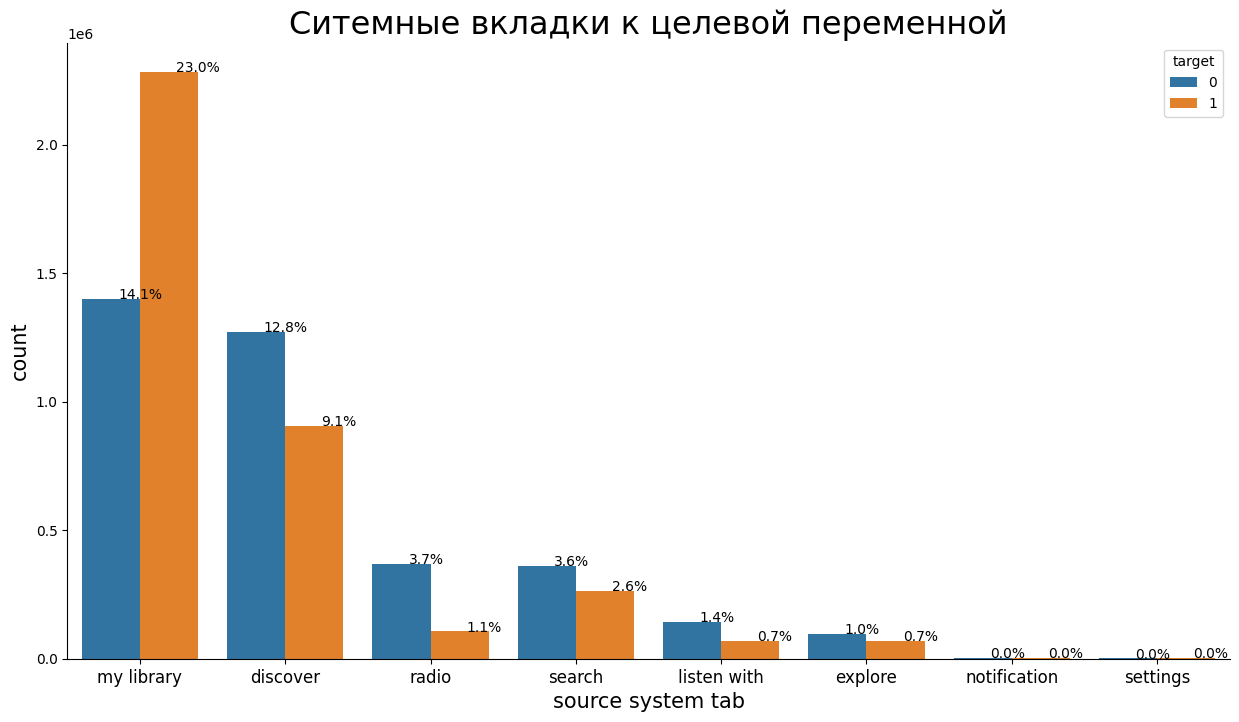

In [199]:
a = pd.DataFrame(train_df.groupby(['source_system_tab', 'target']).size().reset_index())
a = a.sort_values(by = 0, ascending = False)

plt.figure(figsize = (15,8))
ax = sns.barplot(x= 'source_system_tab',y = 0, data = a, hue = 'target')
plt.xticks(fontsize = 12)
plt.xlabel('source system tab', fontdict = {'fontsize':15})
plt.ylabel('count', fontdict = {'fontsize':15})
plt.title('Ситемные вкладки к целевой переменной', fontdict = {'fontsize': 23})

for p in ax.patches:
        ax.annotate('{:.1f}%'.format( 100*p.get_height()/concat_df.shape[0]), (p.get_x()+0.25, p.get_height()+0.5), fontsize = 10)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.show()

* 30.9% пользователей повторно слушают выбранные песни через мою библиотеку.  
* 17.3% пользователей обнаружили песни, которые не слушали более одного раза.

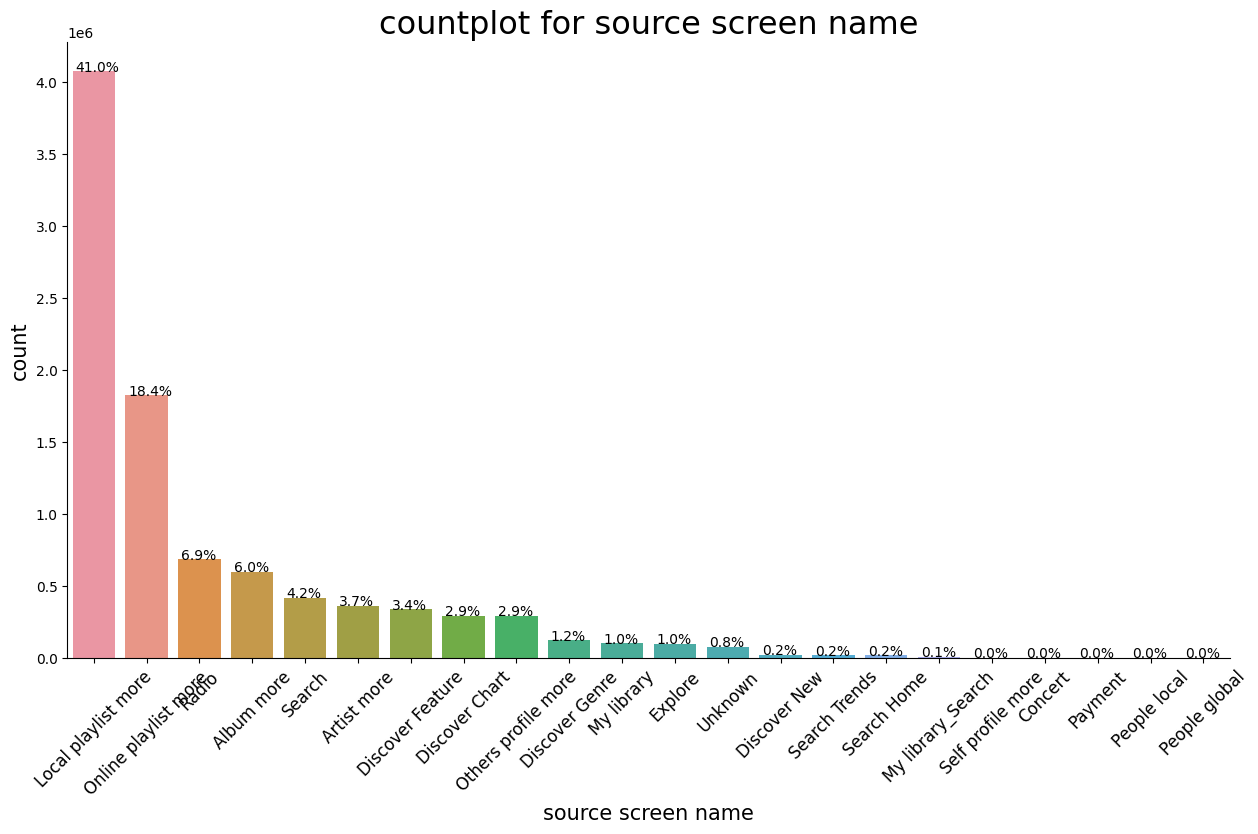

In [200]:
a = pd.DataFrame(concat_df.groupby('source_screen_name').size().reset_index())
a = a.sort_values(by = 0, ascending = False)

plt.figure(figsize = (15,8))
ax = sns.barplot(x= 'source_screen_name',y = 0, data = a)
plt.xticks(rotation = 45, fontsize = 12)
plt.xlabel('source screen name', fontdict = {'fontsize':15})
plt.ylabel('count', fontdict = {'fontsize':15})
plt.title('countplot for source screen name', fontdict = {'fontsize': 23})

for p in ax.patches:
        ax.annotate('{:.1f}%'.format( 100*p.get_height()/concat_df.shape[0]), (p.get_x()+0.05, p.get_height()+0.5), fontsize = 10)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.show()

* 43.8% пользователей используют локальный плейлист для воспроизведения песен.
* Мы также можем сделать вывод, что большинство пользователей ориентируются на свои песни, поскольку они даже не пользуются поиском в моей библиотеке.

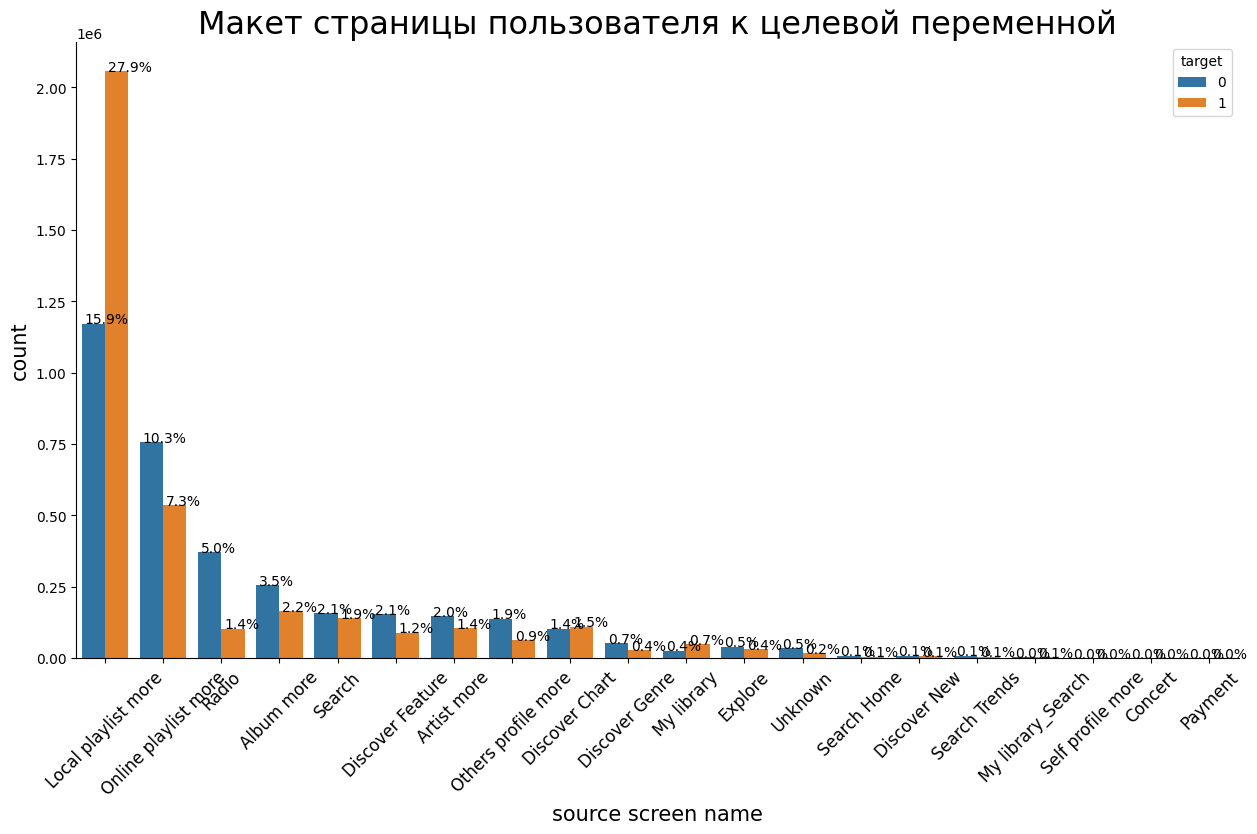

In [203]:
a = pd.DataFrame(train_df.groupby(['source_screen_name', 'target']).size().reset_index())
a = a.sort_values(by = 0, ascending = False)

plt.figure(figsize = (15,8))
ax = sns.barplot(x= 'source_screen_name',y = 0, hue = 'target', data = a)
plt.xticks(rotation = 45, fontsize = 12)
plt.xlabel('source screen name', fontdict = {'fontsize':15})
plt.ylabel('count', fontdict = {'fontsize':15})
plt.title('Макет страницы пользователя к целевой переменной', fontdict = {'fontsize': 23})

for p in ax.patches:
        ax.annotate('{:.1f}%'.format( 100*p.get_height()/train_df.shape[0]), (p.get_x()+0.05, p.get_height()+0.5), fontsize = 10)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.show()



* 27,9% пользователей постоянно слушают песни из локального плейлиста.
* 5,0% пользователей слушают песни с радио, которые не прослушивают более одного раза.

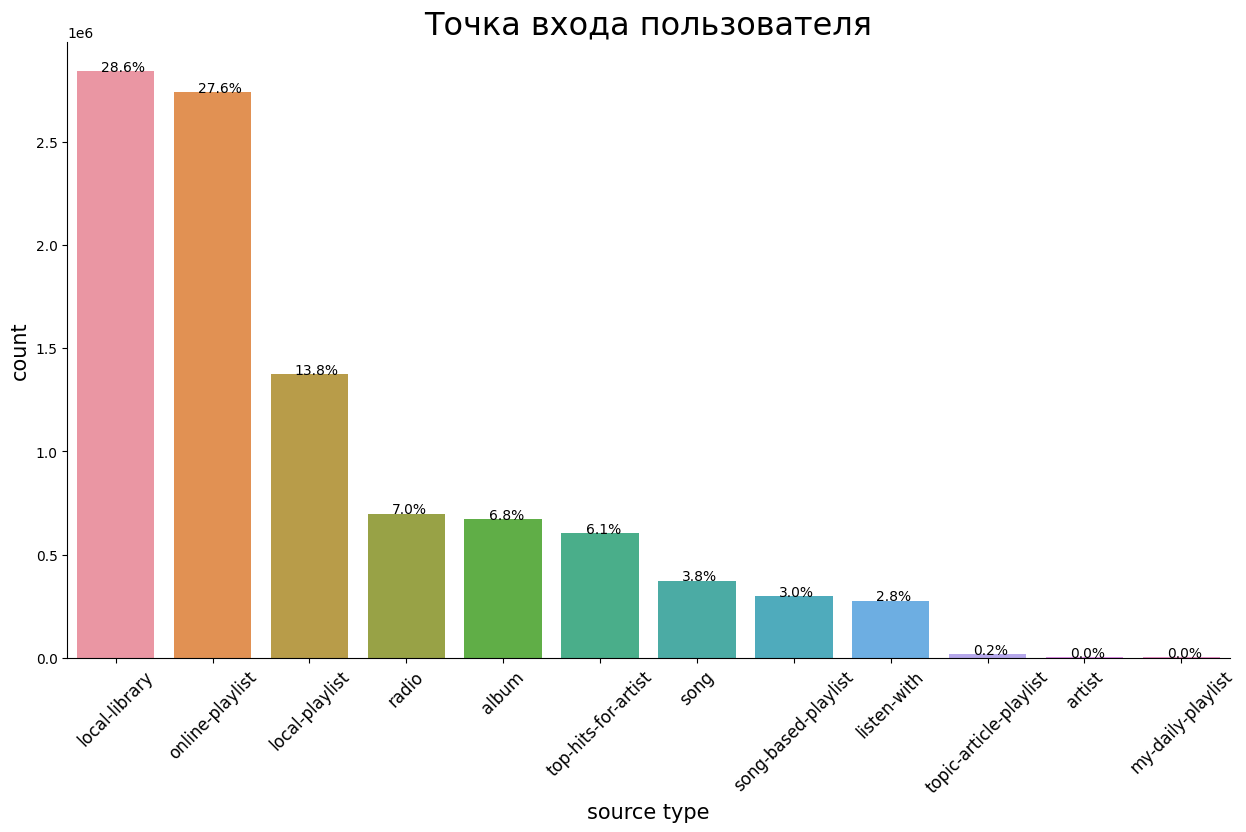

In [204]:
a = pd.DataFrame(concat_df.groupby('source_type').size().reset_index())
a = a.sort_values(by = 0, ascending = False)

plt.figure(figsize = (15,8))
ax = sns.barplot(x= 'source_type',y = 0, data = a)
plt.xticks(rotation = 45, fontsize = 12)
plt.xlabel('source type', fontdict = {'fontsize':15})
plt.ylabel('count', fontdict = {'fontsize':15})
plt.title('Точка входа пользователя', fontdict = {'fontsize': 23})

for p in ax.patches:
        ax.annotate('{:.1f}%'.format( 100*p.get_height()/concat_df.shape[0]), (p.get_x()+0.25, p.get_height()+0.5), fontsize = 10)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.show()

* 72% пользователей используют приложение с использованием локальной библиотеки, онлайн-плейлиста и локального списка воспроизведения.

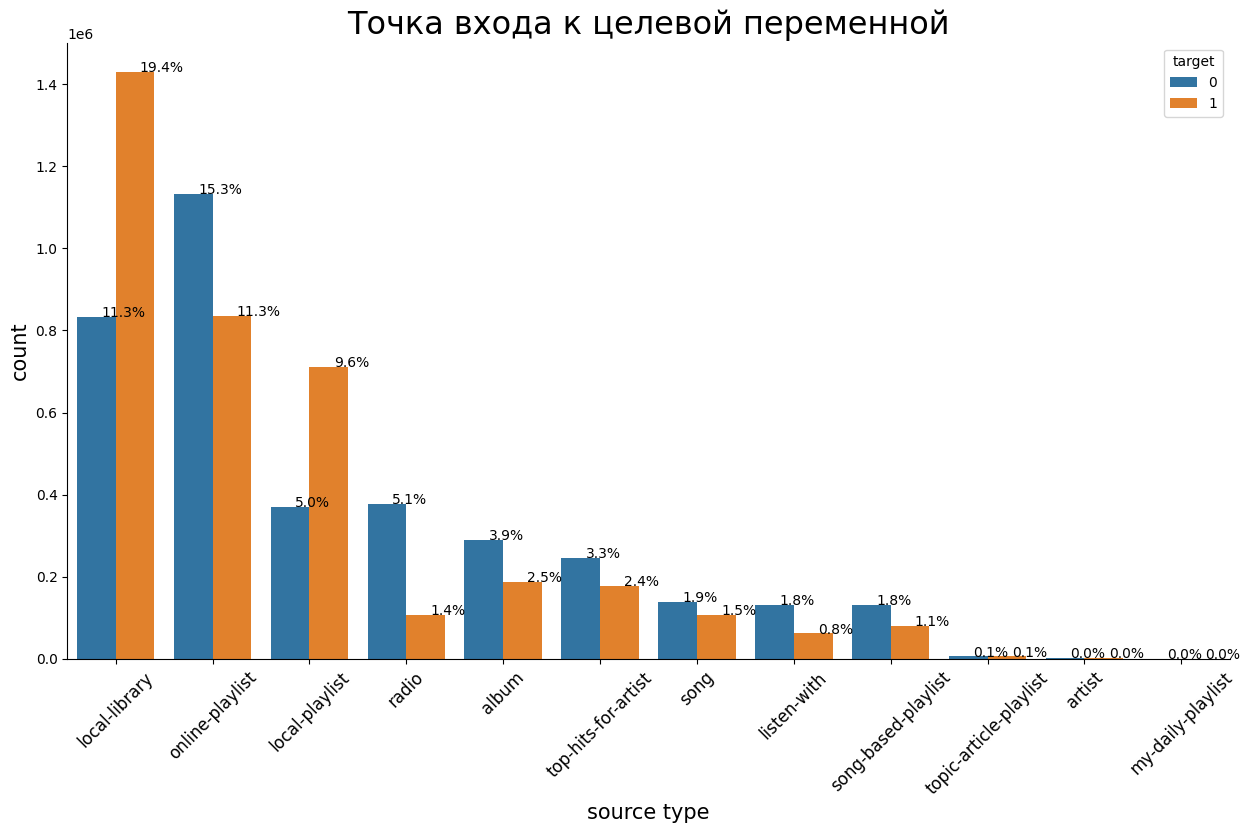

In [207]:
a = pd.DataFrame(train_df.groupby(['source_type', 'target']).size().reset_index())
a = a.sort_values(by = 0, ascending = False)

plt.figure(figsize = (15,8))
ax = sns.barplot(x= 'source_type',y = 0, data = a, hue = 'target')
plt.xticks(rotation = 45, fontsize = 12)
plt.xlabel('source type', fontdict = {'fontsize':15})
plt.ylabel('count', fontdict = {'fontsize':15})
plt.title('Точка входа к целевой переменной', fontdict = {'fontsize': 23})

for p in ax.patches:
        ax.annotate('{:.1f}%'.format( 100*p.get_height()/train_df.shape[0]), (p.get_x()+0.25, p.get_height()+0.5), fontsize = 10)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.show()


* 19.4% of users listening songs repeatedly from Local library.
* 5.1% of users Listening songs from radio where not listend more than once.

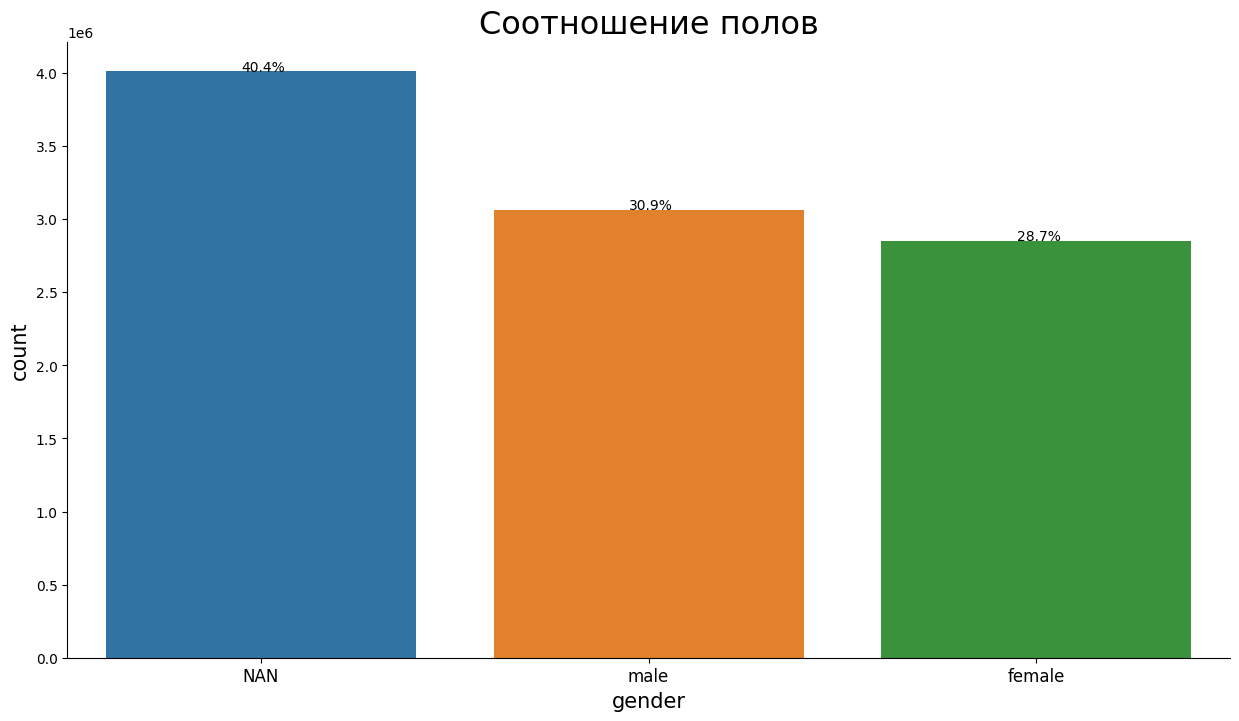

In [211]:
a = concat_df['gender']
a.replace(np.nan, 'NAN',inplace = True)
a = pd.DataFrame(concat_df.groupby('gender').size().reset_index())
a = a.sort_values(by = 0, ascending = False)

plt.figure(figsize = (15,8))
ax = sns.barplot(x= 'gender',y = 0, data = a)
plt.xticks( fontsize = 12)
plt.xlabel('gender', fontdict = {'fontsize':15})
plt.ylabel('count', fontdict = {'fontsize':15})
plt.title('Соотношение полов', fontdict = {'fontsize': 23})

for p in ax.patches:
        ax.annotate('{:.1f}%'.format( 100*p.get_height()/concat_df.shape[0]), (p.get_x()+0.35, p.get_height()+0.5), fontsize = 10)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.show()

* Количество пропущенных значений очень велико.
* Делать выводы по половому признаку нельзя.

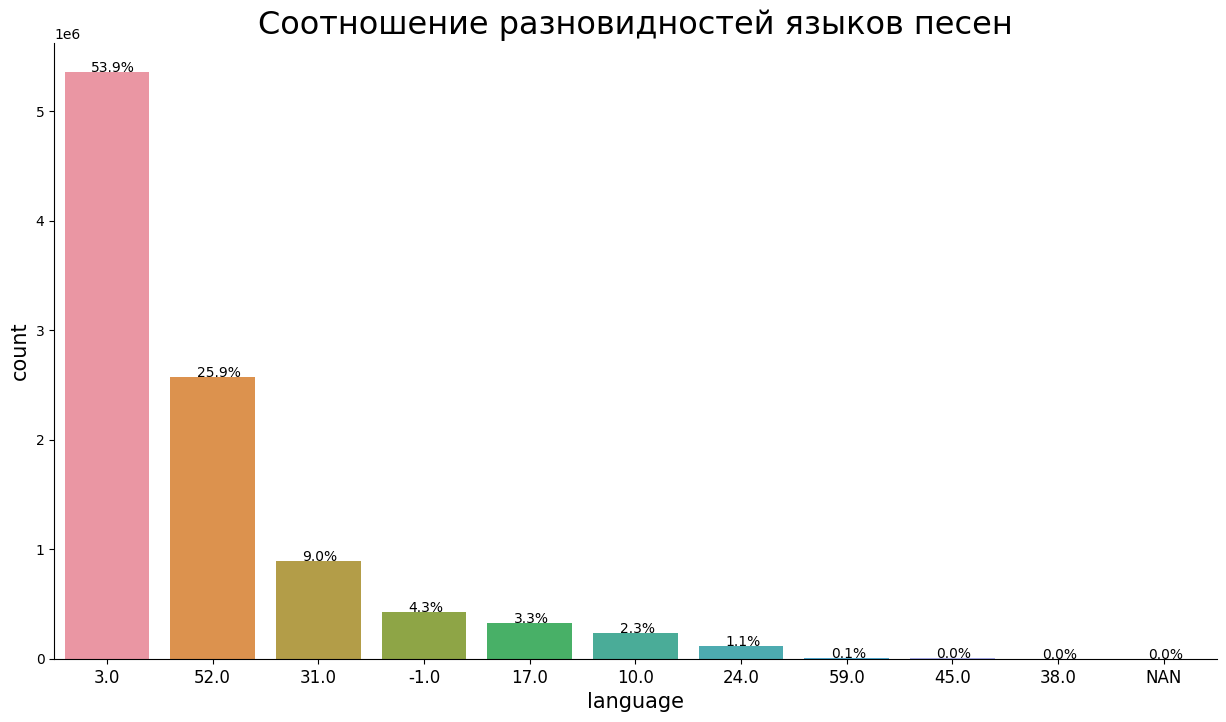

In [213]:

a = concat_df['language']
a.replace(np.nan, 'NAN',inplace = True)
a = pd.DataFrame(concat_df.groupby('language').size().reset_index())
a = a.sort_values(by = 0, ascending = False)

plt.figure(figsize = (15,8))
ax = sns.barplot(x= 'language',y = 0, data = a)
plt.xticks( fontsize = 12)
plt.xlabel('language', fontdict = {'fontsize':15})
plt.ylabel('count', fontdict = {'fontsize':15})
plt.title('Соотношение разновидностей языков песен', fontdict = {'fontsize': 23})

for p in ax.patches:
        ax.annotate('{:.1f}%'.format( 100*p.get_height()/concat_df.shape[0]), (p.get_x()+0.25, p.get_height()+0.5), fontsize = 10)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.show()

* 54,8% пользователей используют песни на языке 3.0.
* Можно сделать вывод, что язык 3.0 является местным языком в том регионе/стране, слушают песни.

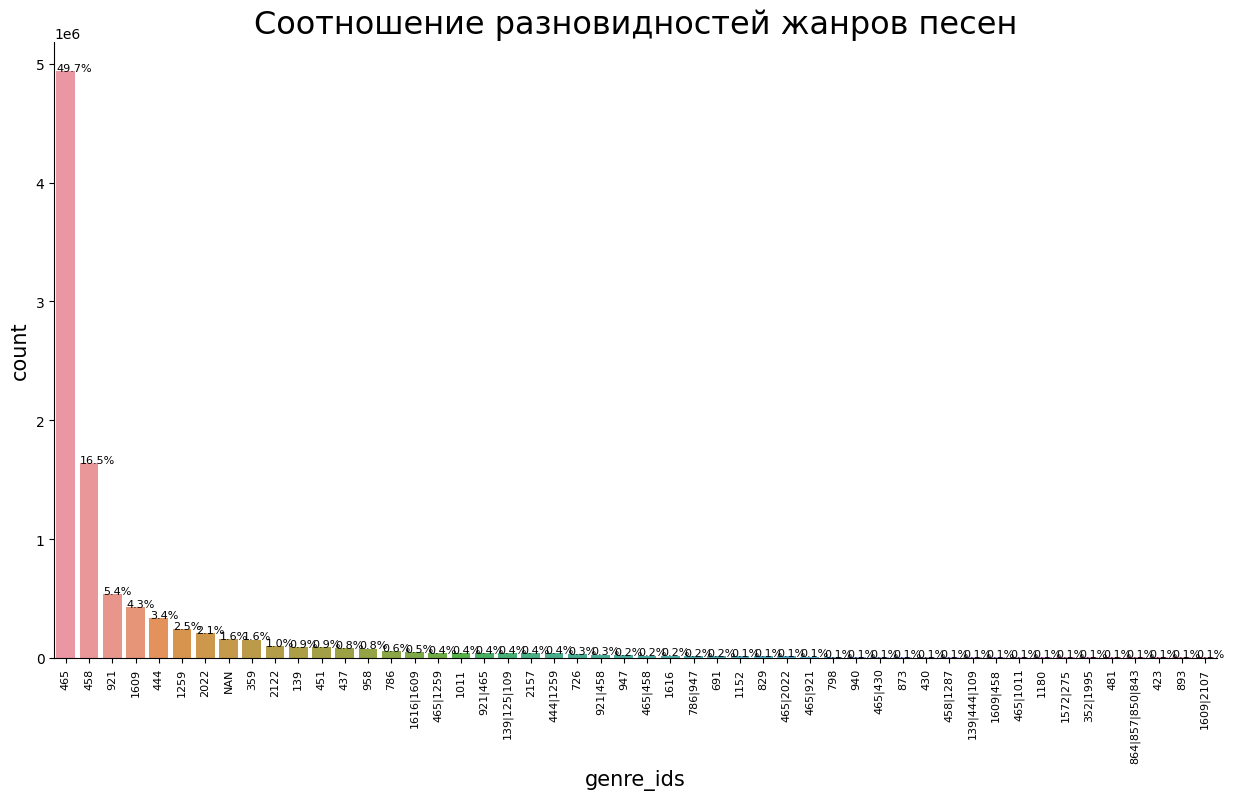

In [215]:
a = concat_df['genre_ids']
a.replace(np.nan, 'NAN',inplace = True)
a = pd.DataFrame(concat_df.groupby('genre_ids').size().reset_index())
a = a.sort_values(by = 0, ascending = False)
a = a[:50]

plt.figure(figsize = (15,8))
ax = sns.barplot(x= 'genre_ids',y = 0, data = a)
plt.xticks(rotation = 90,  fontsize = 8)
plt.xlabel('genre_ids', fontdict = {'fontsize':15})
plt.ylabel('count', fontdict = {'fontsize':15})
plt.title('Соотношение разновидностей жанров песен', fontdict = {'fontsize': 23})

for p in ax.patches:
        ax.annotate('{:.1f}%'.format( 100*p.get_height()/concat_df.shape[0]), (p.get_x()+0.01, p.get_height()+0.1), fontsize = 8)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.show()

* 51.7% of users listen songs with genre id 465.

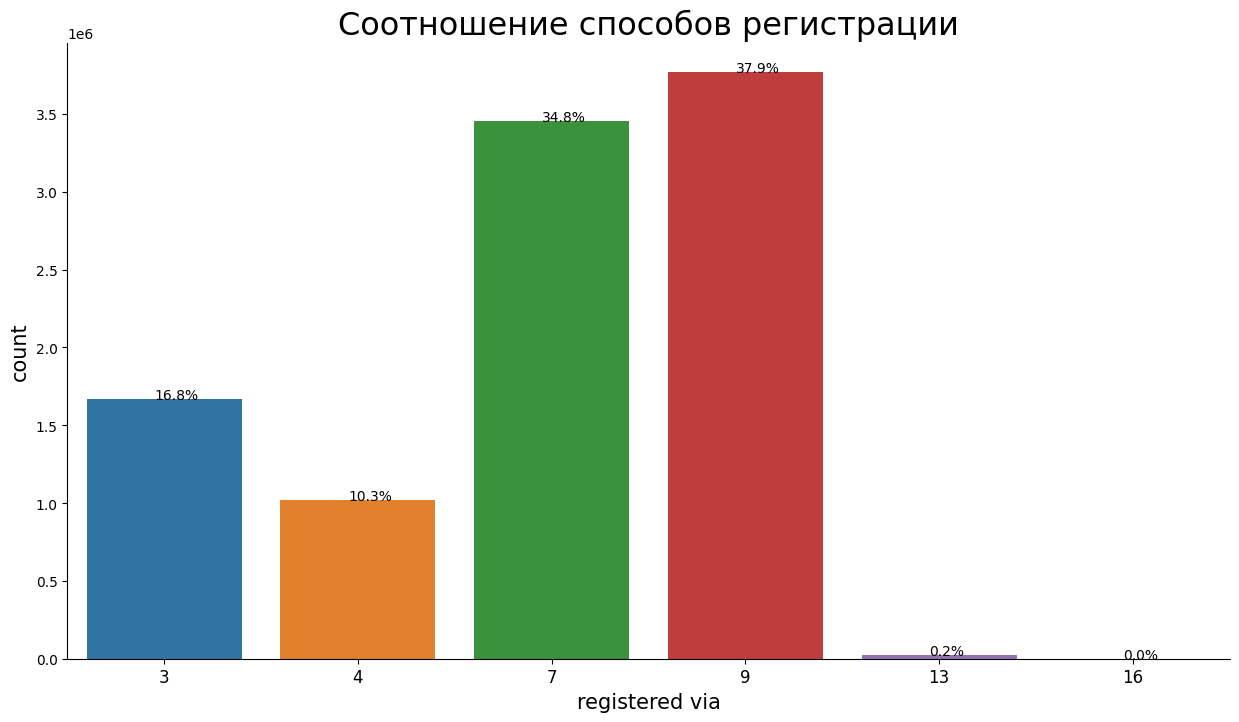

In [217]:
a = concat_df['registered_via']
a.replace(np.nan, 'NAN',inplace = True)
a = pd.DataFrame(concat_df.groupby('registered_via').size().reset_index())
a = a.sort_values(by = 0, ascending = False)

plt.figure(figsize = (15,8))
ax = sns.barplot(x= 'registered_via',y = 0, data = a)
plt.xticks( fontsize = 12)
plt.xlabel('registered via', fontdict = {'fontsize':15})
plt.ylabel('count', fontdict = {'fontsize':15})
plt.title('Соотношение способов регистрации', fontdict = {'fontsize': 23})

for p in ax.patches:
        ax.annotate('{:.1f}%'.format( 100*p.get_height()/concat_df.shape[0]), (p.get_x()+0.35, p.get_height()+0.5), fontsize = 10)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.show()


* 72.8% пользователей зарегистрировались с помощью 7-го и 9-го способов регистрации.

### Разведочный анализ непрерывных переменных

count    9.934208e+06
mean     1.750373e+01
std      2.172704e+01
min     -4.300000e+01
25%      0.000000e+00
50%      2.100000e+01
75%      2.900000e+01
max      1.051000e+03
Name: bd, dtype: float64


C:\Users\Asus\AppData\Local\Temp\ipykernel_16600\3905203631.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(a = concat_df['bd'], color='green')


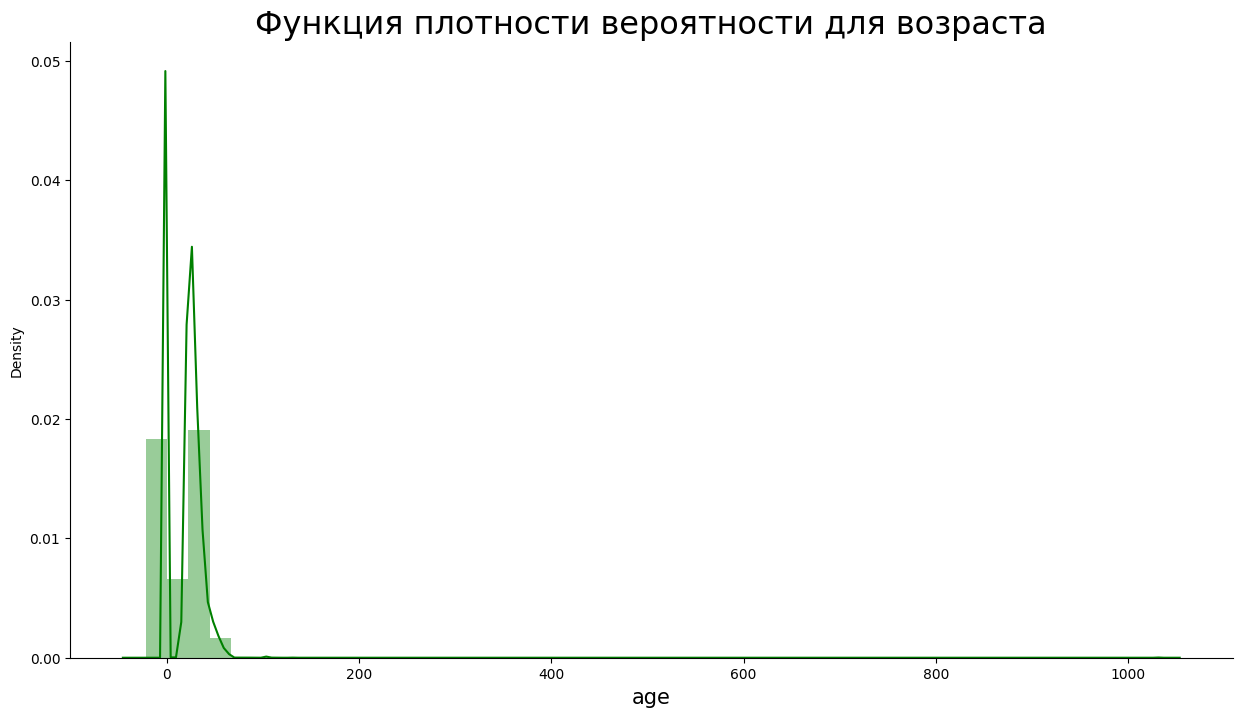

In [237]:
print(concat_df['bd'].describe())
plt.figure(figsize = (15,8))
ax = sns.distplot(a = concat_df['bd'], color='green')
plt.xlabel('age', fontdict = {'fontsize':15})
plt.title('Функция плотности вероятности для возраста', fontdict = {'fontsize': 23})
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

count    9.934208e+06
mean     1.750373e+01
std      2.172704e+01
min     -4.300000e+01
25%      0.000000e+00
50%      2.100000e+01
75%      2.900000e+01
max      1.051000e+03
Name: bd, dtype: float64


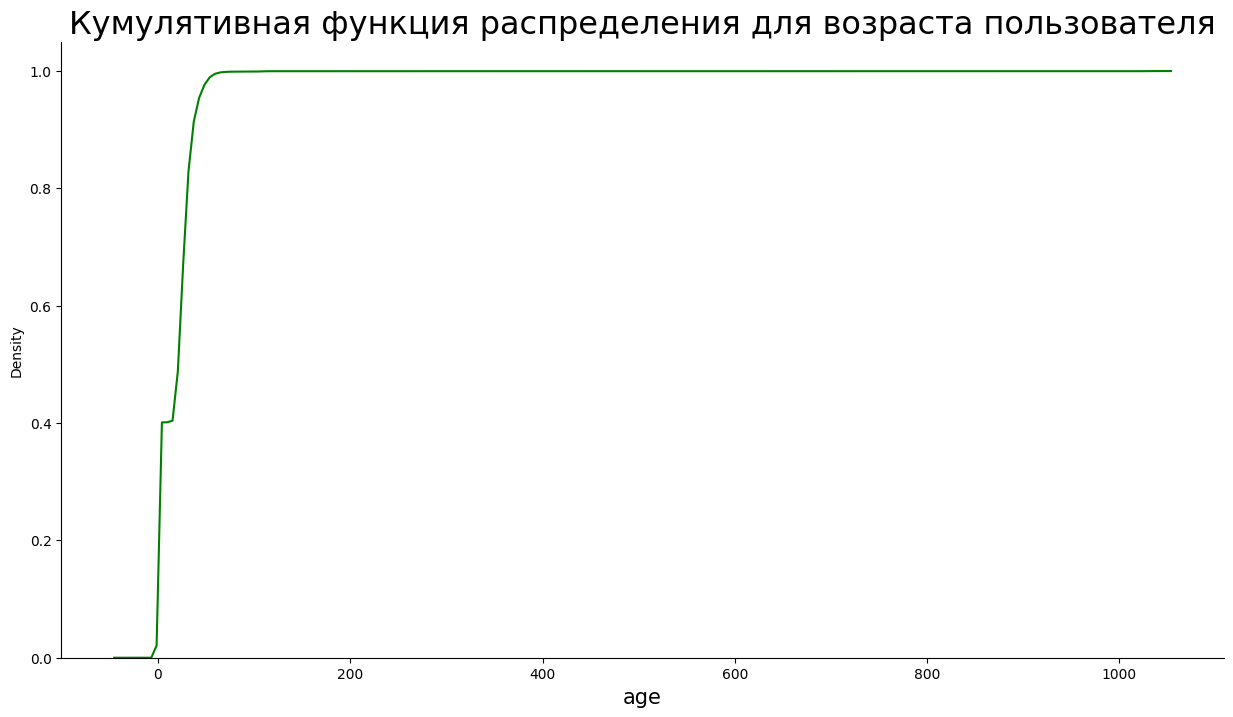

In [238]:
print(concat_df['bd'].describe())
plt.figure(figsize = (15,8))
ax = sns.kdeplot(data = concat_df['bd'], color='green', cumulative = True)
plt.xlabel('age', fontdict = {'fontsize':15})
plt.title('Кумулятивная функция распределения для возраста пользователя', fontdict = {'fontsize': 23})
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

In [222]:
for i in range(0, 101, 10):
    print(str(i)+'th Percentile of age is '+str(np.nanpercentile(concat_df['bd'], i)))
for i in range(90, 101, 1):
    print(str(i)+'th Percentile of age is '+str(np.nanpercentile(concat_df['bd'], i)))
for i in [99.0, 99.1, 99.2, 99.3, 99.4, 99.5, 99.6, 99.7, 99.8, 99.9, 100]:
    print(str(i)+'th Percentile of age is '+str(np.nanpercentile(concat_df['bd'], i)))


0th Percentile of age is -43.0
10th Percentile of age is 0.0
20th Percentile of age is 0.0
30th Percentile of age is 0.0
40th Percentile of age is 0.0
50th Percentile of age is 21.0
60th Percentile of age is 24.0
70th Percentile of age is 27.0
80th Percentile of age is 30.0
90th Percentile of age is 36.0
100th Percentile of age is 1051.0
90th Percentile of age is 36.0
91th Percentile of age is 37.0
92th Percentile of age is 38.0
93th Percentile of age is 39.0
94th Percentile of age is 40.0
95th Percentile of age is 42.0
96th Percentile of age is 44.0
97th Percentile of age is 46.0
98th Percentile of age is 50.0
99th Percentile of age is 54.0
100th Percentile of age is 1051.0
99.0th Percentile of age is 54.0
99.1th Percentile of age is 55.0
99.2th Percentile of age is 55.0
99.3th Percentile of age is 57.0
99.4th Percentile of age is 58.0
99.5th Percentile of age is 59.0
99.6th Percentile of age is 60.0
99.7th Percentile of age is 62.0
99.8th Percentile of age is 66.0
99.9th Percentile o

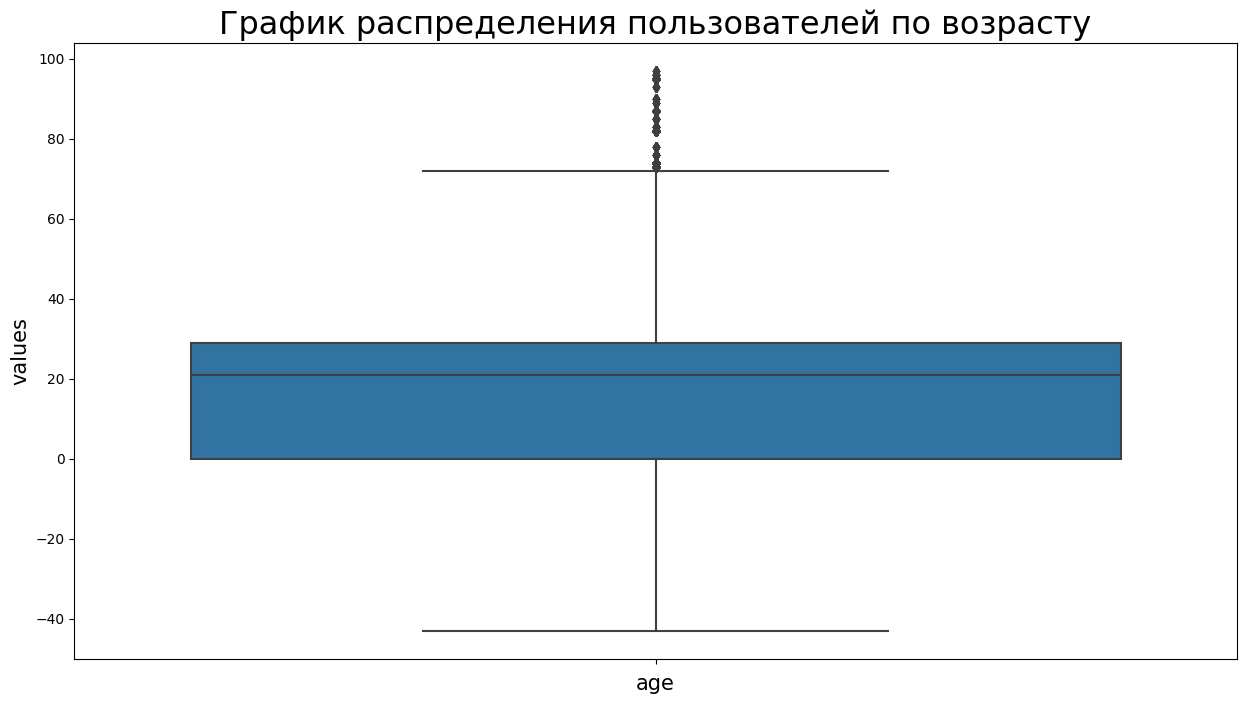

In [223]:
plt.figure(figsize = (15, 8))
a = concat_df['bd'] >= 0
b = concat_df['bd'] <= 100
a = concat_df[a.values.tolist() and b.values.tolist()]
sns.boxplot(y = a['bd'])
plt.title('График распределения пользователей по возрасту', fontdict = {'fontsize': 23})
plt.xlabel('age', fontdict = {'fontsize':15})
plt.ylabel('values', fontdict = {'fontsize':15})
plt.show()

* Функция имеет выбросы.
* Большинство значений находятся в диапазоне от 0 до 100.

count    9.934069e+06
mean     2.447922e+05
std      6.894272e+04
min      1.393000e+03
25%      2.144130e+05
50%      2.409600e+05
75%      2.715680e+05
max      1.085171e+07
Name: song_length, dtype: float64


C:\Users\Asus\AppData\Local\Temp\ipykernel_16600\3619959001.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(a = concat_df['song_length'], color='green')


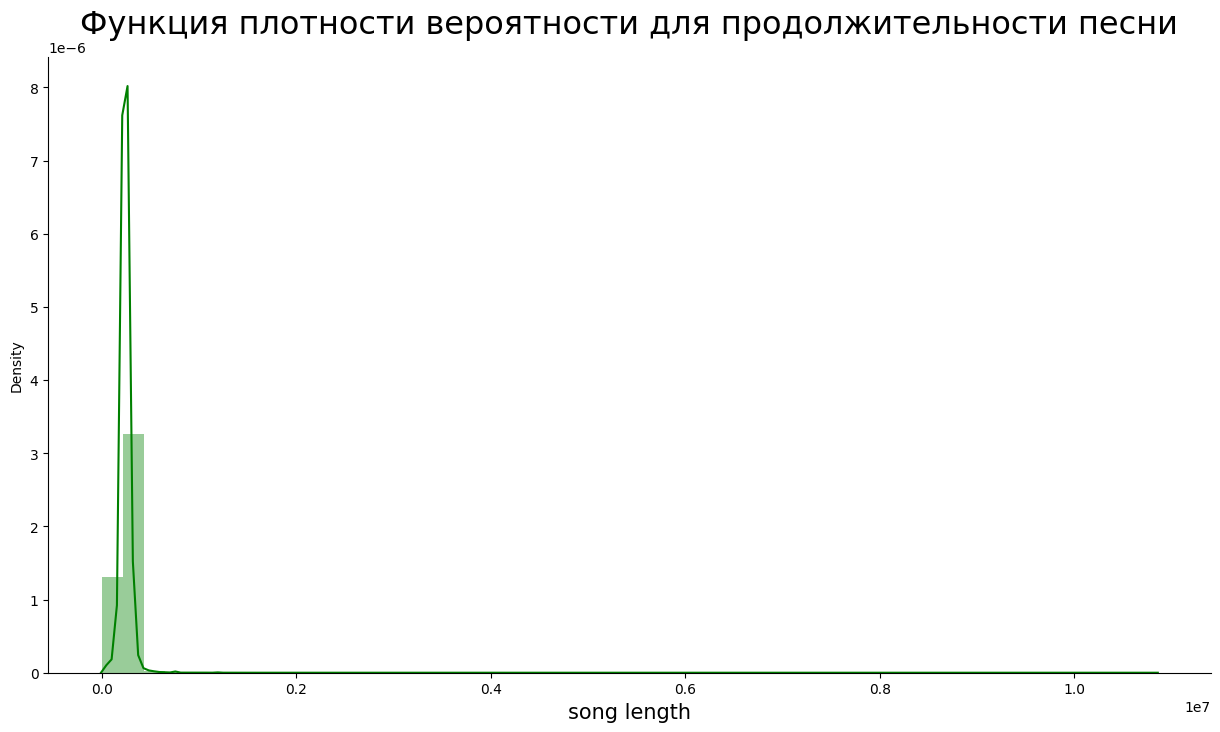

In [236]:
print(concat_df['song_length'].describe())
plt.figure(figsize = (15,8))
ax = sns.distplot(a = concat_df['song_length'], color='green')
plt.xlabel('song length', fontdict = {'fontsize':15})
plt.title('Функция плотности вероятности для продолжительности песни', fontdict = {'fontsize': 23})
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

count    9.934069e+06
mean     1.238105e+01
std      2.378642e-01
min      7.239215e+00
25%      1.227566e+01
50%      1.239239e+01
75%      1.251197e+01
max      1.619983e+01
Name: song_length, dtype: float64


C:\Users\Asus\AppData\Local\Temp\ipykernel_16600\2081104763.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(a = np.log(concat_df['song_length']), color='green')


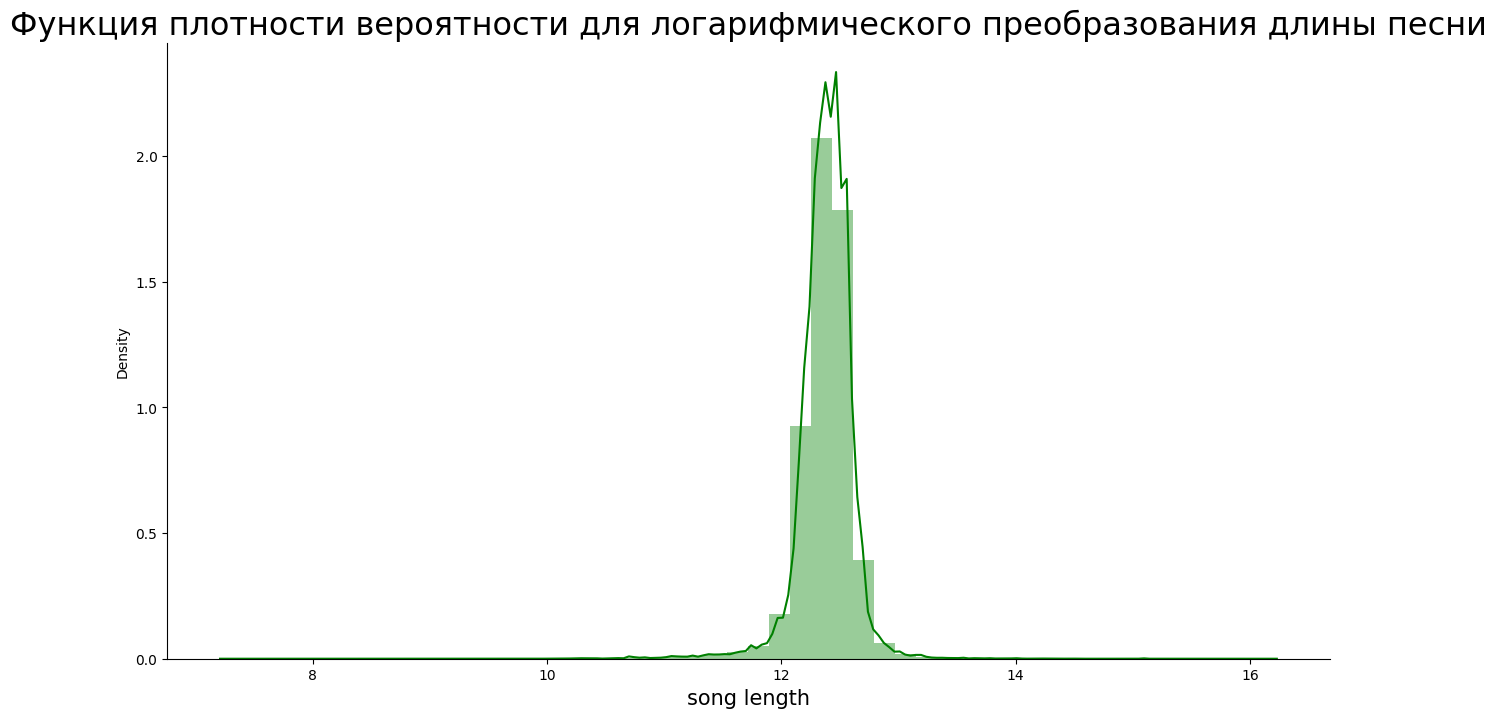

In [234]:
a = np.log(concat_df['song_length'])
print(a.describe())
plt.figure(figsize = (15,8))
ax = sns.distplot(a = np.log(concat_df['song_length']), color='green')
plt.xlabel('song length', fontdict = {'fontsize':15})
plt.title('Функция плотности вероятности для логарифмического преобразования длины песни', fontdict = {'fontsize': 23})
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

count    9.934069e+06
mean     2.447922e+05
std      6.894272e+04
min      1.393000e+03
25%      2.144130e+05
50%      2.409600e+05
75%      2.715680e+05
max      1.085171e+07
Name: song_length, dtype: float64


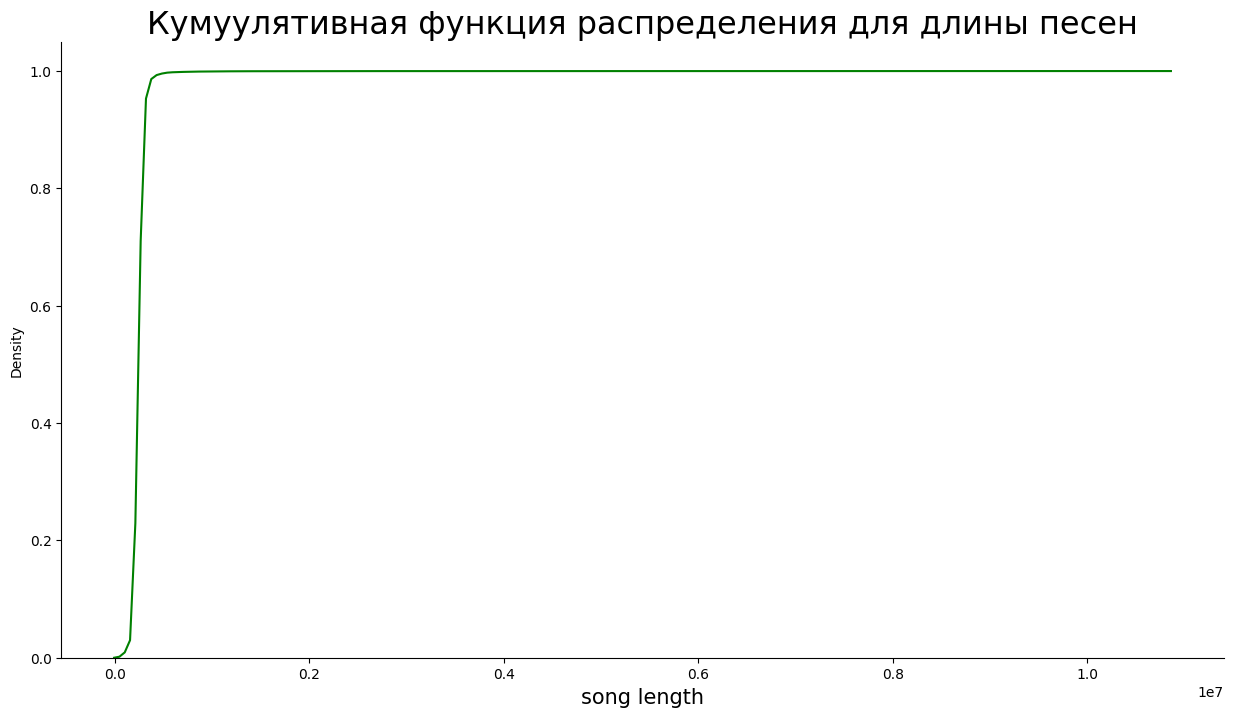

In [235]:
print(concat_df['song_length'].describe())
plt.figure(figsize = (15,8))
ax = sns.kdeplot(data = concat_df['song_length'], color='green', cumulative = True)
plt.xlabel('song length', fontdict = {'fontsize':15})
plt.title('Кумуулятивная функция распределения для длины песен', fontdict = {'fontsize': 23})
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

In [227]:
for i in range(0, 101, 10):
    print(str(i)+'th Percentile of song length is '+str(np.nanpercentile(concat_df['song_length'], i)))
for i in range(90, 101, 1):
    print(str(i)+'th Percentile of song length is '+str(np.nanpercentile(concat_df['song_length'], i)))


0th Percentile of song length is 1393.0
10th Percentile of song length is 191007.0
20th Percentile of song length is 207621.0
30th Percentile of song length is 219752.0
40th Percentile of song length is 230713.0
50th Percentile of song length is 240960.0
60th Percentile of song length is 252958.0
70th Percentile of song length is 264907.0
80th Percentile of song length is 279510.0
90th Percentile of song length is 297912.0
100th Percentile of song length is 10851706.0
90th Percentile of song length is 297912.0
91th Percentile of song length is 300826.0
92th Percentile of song length is 303856.0
93th Percentile of song length is 307757.0
94th Percentile of song length is 311797.0
95th Percentile of song length is 318912.0
96th Percentile of song length is 325276.0
97th Percentile of song length is 334691.0
98th Percentile of song length is 353036.0
99th Percentile of song length is 396689.0
100th Percentile of song length is 10851706.0


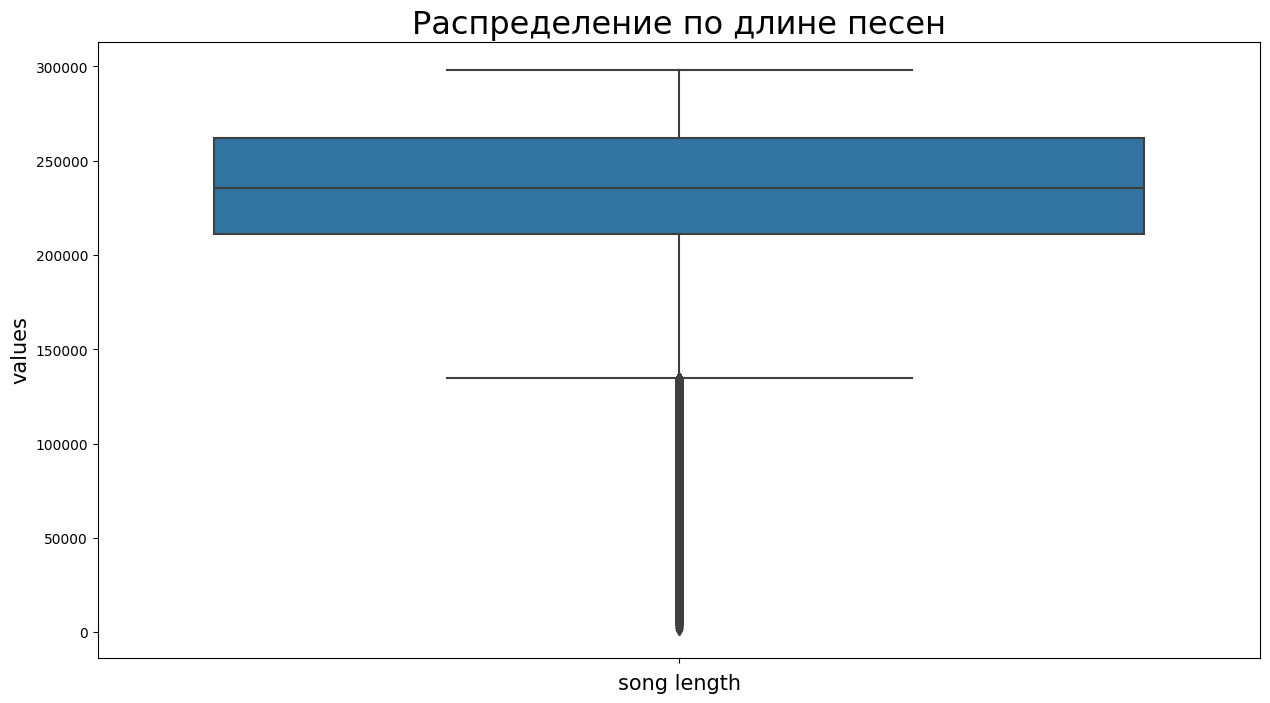

In [239]:
plt.figure(figsize = (15, 8))
a = concat_df['song_length'] >= 191518
b = concat_df['song_length'] <= 298260
a = concat_df[a.values.tolist() and b.values.tolist()]
sns.boxplot(y = a['song_length'])
plt.title('Распределение по длине песен', fontdict = {'fontsize': 23})
plt.xlabel('song length', fontdict = {'fontsize':15})
plt.ylabel('values', fontdict = {'fontsize':15})
plt.show()

* Признак имеет выбросы.
* Длина песни находится в диапазоне от 191518 мс до 395947 мс.
* Применение логарифмического преобразования к длине песни имеет смысл для предотвращения выбросов.

C:\Users\Asus\AppData\Local\Temp\ipykernel_16600\1913486384.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(concat_df['registration_init_time'].astype(str).apply(lambda x: int(x[:4])), kde = False)


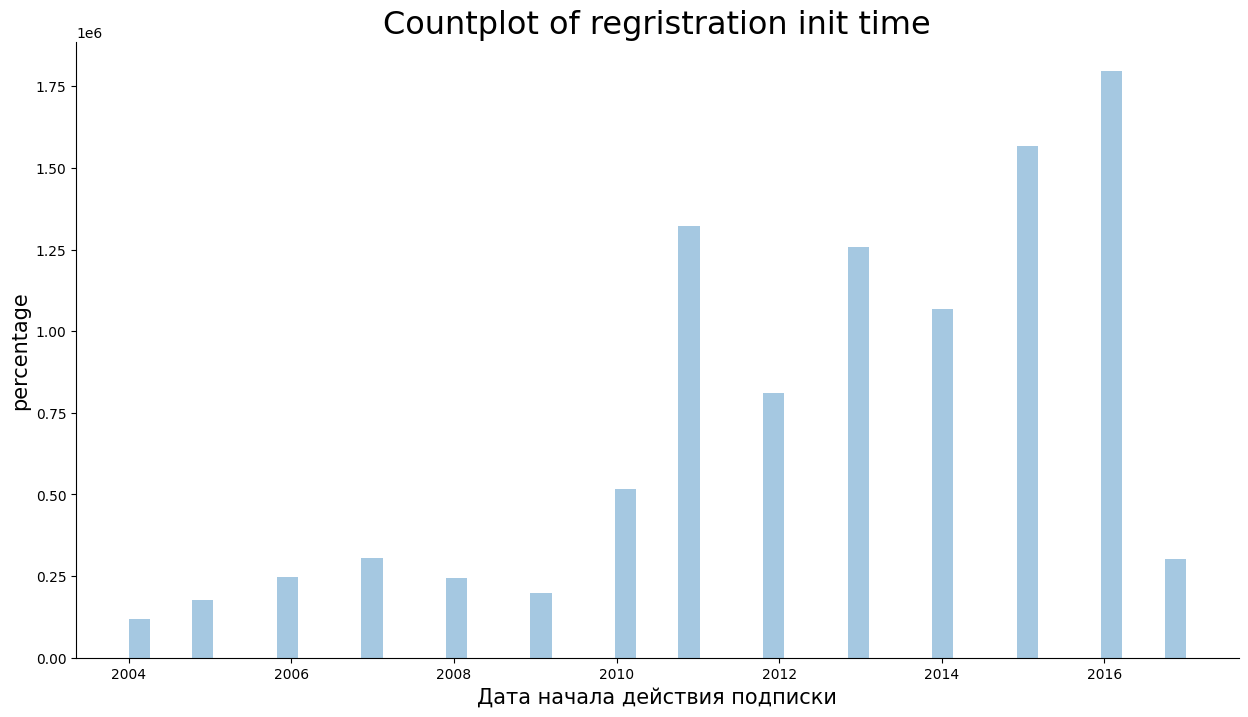

In [230]:
plt.figure(figsize = (15, 8))
ax = sns.distplot(concat_df['registration_init_time'].astype(str).apply(lambda x: int(x[:4])), kde = False)
plt.title('Countplot of regristration init time', fontdict = {'fontsize': 23})
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.xlabel('Дата начала действия подписки', fontdict = {'fontsize':15})
plt.ylabel('percentage', fontdict = {'fontsize':15})
plt.show()

* Количество зарегистрированных пользователей увеличивается с течением времени.

count    9.934208e+06
mean     2.017162e+07
std      3.794595e+03
min      1.970010e+07
25%      2.017091e+07
50%      2.017093e+07
75%      2.017101e+07
max      2.020102e+07
Name: expiration_date, dtype: float64


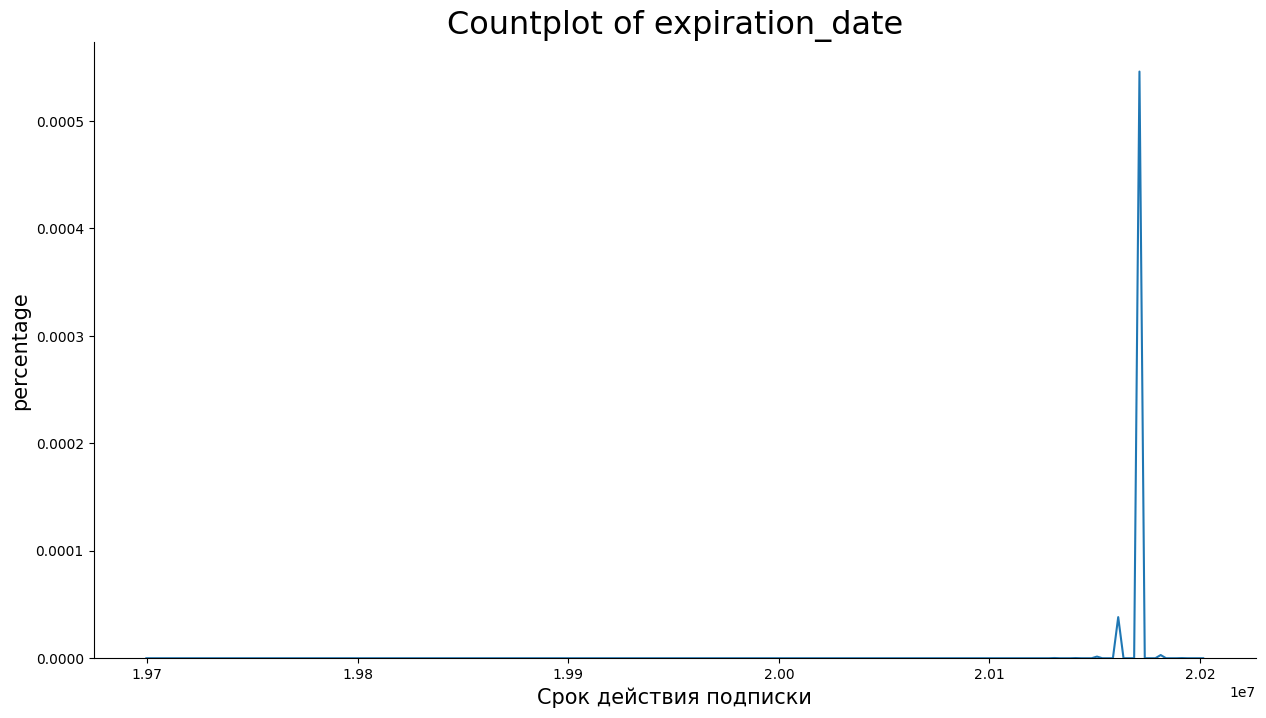

In [232]:
print(concat_df['expiration_date'].describe())
plt.figure(figsize = (15, 8))
ax = sns.kdeplot(concat_df['expiration_date'])
plt.title('Countplot of expiration_date', fontdict = {'fontsize': 23})
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.xlabel('Срок действия подписки', fontdict = {'fontsize':15})
plt.ylabel('percentage', fontdict = {'fontsize':15})
plt.show()

* В переменной есть отклонения.
* Срок действия большинства подписок пользователей истекает в 2017 году.

### Продолжение разведочного анализа по сгенерированным признакам 

1. Duration of subscription

count    9.934208e+06
mean     1.620282e+03
std      1.133398e+03
min     -1.619100e+04
25%      7.000000e+02
50%      1.430000e+03
75%      2.284000e+03
max      5.149000e+03
Name: membership_duration, dtype: float64


C:\Users\Asus\AppData\Local\Temp\ipykernel_16600\3938844755.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(a = concat_df['membership_duration'], color='red')


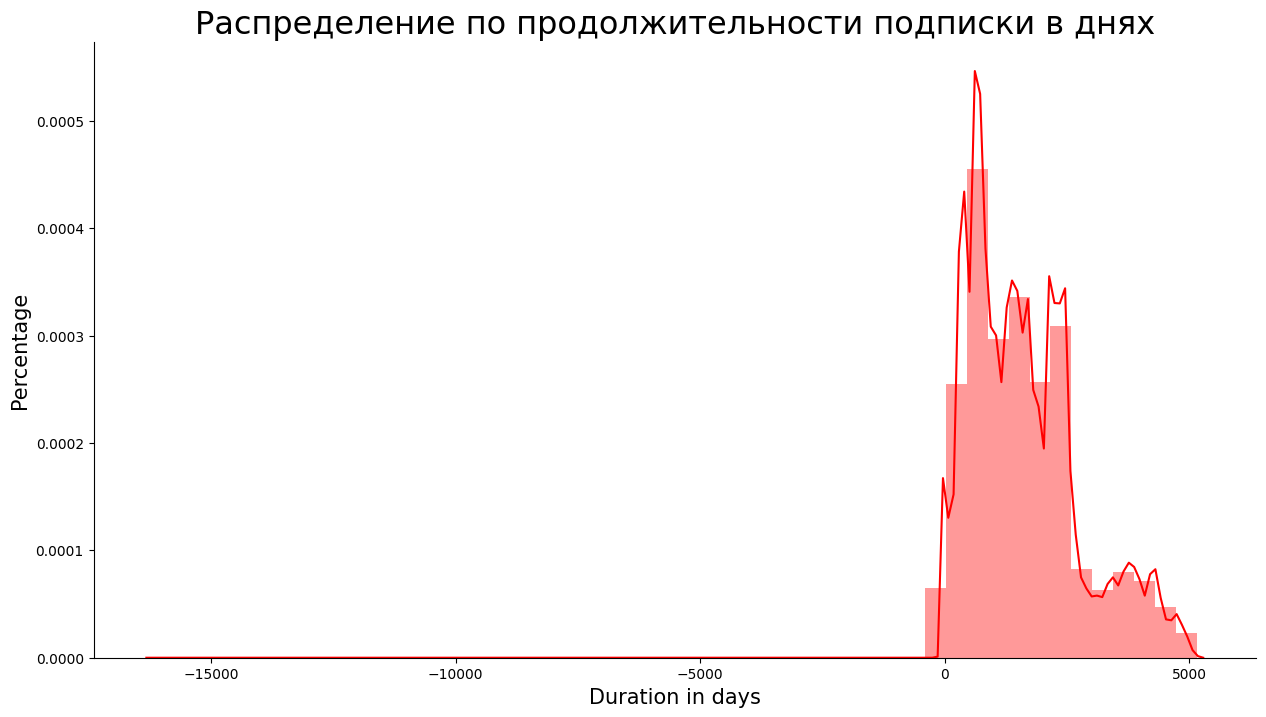

In [240]:
a = pd.to_datetime(concat_df['expiration_date'], format = '%Y%m%d') - pd.to_datetime(concat_df['registration_init_time'], format = '%Y%m%d')
a =list(a)
a = [i.days for i in a]
concat_df['membership_duration'] = a
print(concat_df['membership_duration'].describe())
plt.figure(figsize = (15,8))
ax = sns.distplot(a = concat_df['membership_duration'], color='red')
plt.xlabel('Duration in days', fontdict = {'fontsize':15})
plt.ylabel('Percentage', fontdict = {'fontsize': 15})
plt.title('Распределение по продолжительности подписки в днях', fontdict = {'fontsize': 23})
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

count    9.934208e+06
mean     1.620282e+03
std      1.133398e+03
min     -1.619100e+04
25%      7.000000e+02
50%      1.430000e+03
75%      2.284000e+03
max      5.149000e+03
Name: membership_duration, dtype: float64


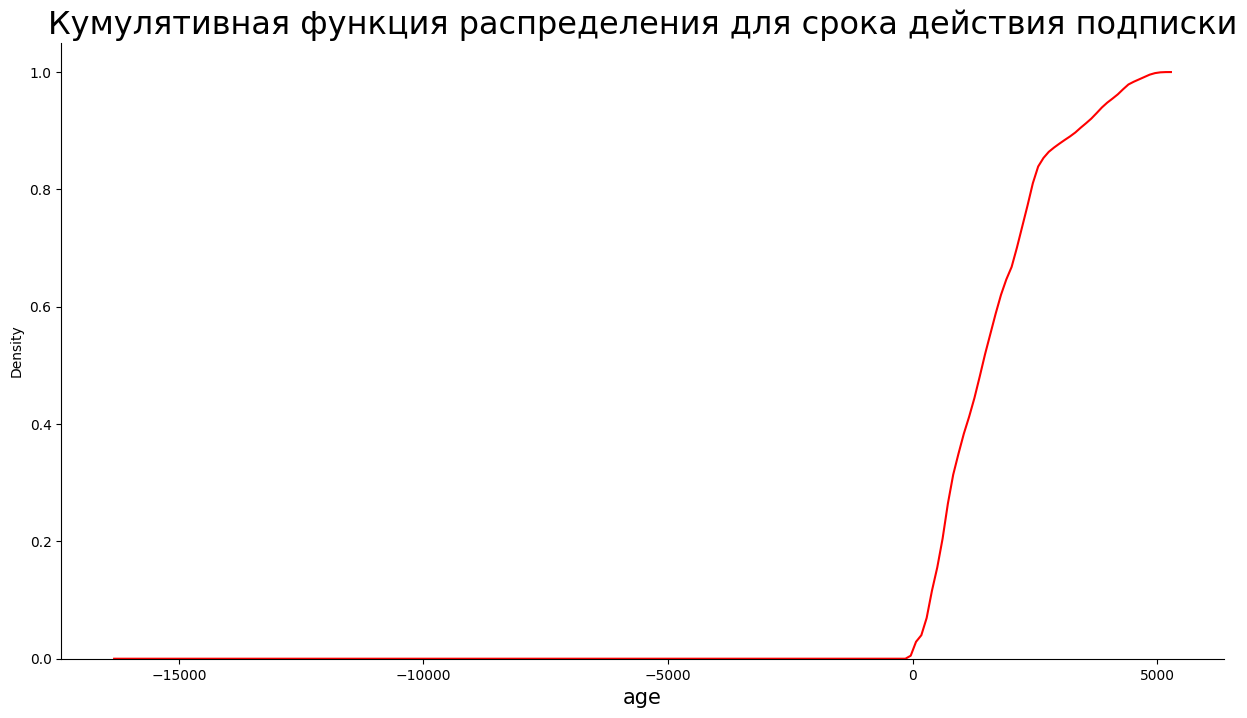

In [241]:
print(concat_df['membership_duration'].describe())
plt.figure(figsize = (15,8))
ax = sns.kdeplot(data = concat_df['membership_duration'], color='red', cumulative = True)
plt.xlabel('age', fontdict = {'fontsize':15})
plt.title('Кумулятивная функция распределения для срока действия подписки', fontdict = {'fontsize': 23})
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)


* В данных есть отклонения.
* Диапазон продолжительности подписки варьируется от 0 до 5000.

In [ ]:
a = pd.DataFrame(concat_df['msno'].value_counts().reset_index())
a.rename(columns = {'index':'msno', 'msno':'song_count'}, inplace=True)
concat_df = concat_df.merge(a, how = 'left',on = 'msno')
print(concat_df['song_count'].describe())
plt.figure(figsize = (15,8))
ax = sns.distplot(a = concat_df['song_count'], color='red')
plt.xlabel('song count', fontdict = {'fontsize':15})
plt.ylabel('Percentage', fontdict = {'fontsize': 15})
plt.title('Распределение количества песен, прослушанных каждым пользователем', fontdict = {'fontsize': 23})
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

In [ ]:
print(np.log(concat_df['song_count']).describe())
plt.figure(figsize = (15,8))
ax = sns.distplot(a = np.log(concat_df['song_count']), color='red')
plt.xlabel('log of song count', fontdict = {'fontsize':15})
plt.ylabel('Percentage', fontdict = {'fontsize': 15})
plt.title('Логарифмическое преобразование количества песен, прослушанных каждым пользователем', fontdict = {'fontsize': 23})
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

In [ ]:
print(concat_df['song_count'].describe())
plt.figure(figsize = (15,8))
ax = sns.kdeplot(data = concat_df['song_count'], color='red', cumulative = True)
plt.xlabel('age', fontdict = {'fontsize':15})
plt.title('Кумулятивная функция распределения по числу песен у пользователя', fontdict = {'fontsize': 23})
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

* Есть некоторые отклонения.
* Логарифмическое преобразование количества песен имеет смысл для предотвращения отклонений.
* Диапазон количества песен варьируется от 0 до 2500.